## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Configure notebook output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display up to 150 rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

### Load the Datasets
Load the dataset created by the preprocessing notebook.

In [3]:
gtd_df = pd.read_csv('../Data/gtd_preprocessed_1997to2017.csv', low_memory=False, index_col = 0,
                      na_values=[''])

In [4]:
gtd_df.shape

(120439, 47)

### Inspect the Structure
The cleansed data frame contains 48 attributes, one of which is used for the data frame index, and 112,251 observations.

In [5]:
# Display a summary of the data frame
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120439 entries, 199601000001 to 201712310032
Data columns (total 47 columns):
iyear               120439 non-null int64
imonth              120439 non-null int64
iday                120439 non-null int64
country_txt         120439 non-null object
region_txt          120439 non-null object
provstate           120439 non-null object
city                120439 non-null object
latitude            119155 non-null float64
longitude           119155 non-null float64
specificity         120439 non-null float64
summary             120439 non-null object
attacktype1_txt     120439 non-null object
targtype1_txt       120439 non-null object
targsubtype1_txt    120439 non-null object
corp1               120439 non-null object
target1             120439 non-null object
natlty1_txt         120439 non-null object
gname               120439 non-null object
nperpcap            109959 non-null float64
weaptype1_txt       120439 non-null object
weapsubtype

### Code Book
Python interprets the data types differently than the code book provided by START.

|ATTRIBUTE|PYTHON DTYPE|CODE BOOK TYPE|DEFINITION|
|:----------------|:--------|:------------|:---------------------------------------|
|eventid|int64|Numeric|12-digit Event ID system. First 8 numbers - date recorded "yyyymmdd". Last 4 numbers - sequential case number for the given day|
|iyear|int64|Numeric|The year in which the incident occurred|
|imonth|int64|Numeric|The month in which the incident occurred.  When the exact month of the incident is unknown, this will be recorded as "0".|
|iday|int64|Numeric|The numeric day of the month on which the incident occurred.  When the exact day of the incident is unknown, the field is recorded as "0".|
|extended|object|Categorical|The duration of an incident extended more than 24 hours.  1 = YES, 0 = NO|
|country_txt|object|Categorical|Identifies the country or location where the incident occurred.  When incident occurred cannot be identified, it is coded as "Unknown.|
|region_txt|object|Categorical|Identifies the region in which the incident occurred, and divided into 1 of 12 categories|
|provstate|object|Text|The name (at the time of event) of the 1st order subnational administrative region in which the event occurs|
|city|object|Text|The name of the city, village, or town in which the incident occurred.  If unknown, then this field contains the smallest administrative area below provstate|
|latitude|float64|Numeric|The latitude (based on WGS1984 standards) of the city in which the event occurred|
|longitude|float64|Numeric|The longitude (based on WGS1984 standards) of the city in which the event occurred.|
|specificity|float64|Categorical|Identifies the geospatial resolution of the latitude and longitude fields. 1 to 5|
|vicinity|object|Categorical|1 = YES, The incident occurred in the immediate vicinity of the city in question.  0 = NO, The incident in the city itself.|
|summary|object|Text|A brief narrative summary of the incident, noting the "when, where, who, what, how, and why.|
|crit1|object|Categorical|The violent act must be aimed at attaining a political, economic, religious, or social goal. 1 = YES, 0 = NO|
|crit2|object|Categorical|There must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience than the immediate victims. 1 = YES, 0 = NO|
|crit3|object|Categorical|The action is outside the context of legitimate warfare activities, insofar as it targets non-combatants.  1 = YES, 0 = NO|
|doubtterr|object|Categorical|There is doubt as to whether the incident is an act of terrorism.  1 = YES, 0 = NO|
|multiple|object|Categorical|Denote that the particular attack was part of a "multiple" incident.  1 = YES, 0 = NO|
|success|object|Categorical|A successful attack depends on the type of attack. The key question is whether or not the attack type took place.  1 = YES, 0 = NO|
|suicide|object|Categorical|Coded "Yes" in those cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 1 = YES, 0 = NO|
|attacktype1_txt|object|Categorical|The general method of attack and often reflects the broad class of tactics used. 9 categories|
|targtype1_txt|object|Categorical|The general type of target/victim.  22 categories|
|targsubtype1_txt|object|Categorical|The more specific target category and provides the next level of designation for each target type. If a target subtype is not applicable this variable is left blank|
|corp1|object|Text|The corporate entity or government agency that was targeted|
|target1|object|Text|The specific person, building, installation, etc., that was targeted and/or victimized|
|natlty1_txt|object|Categorical|The nationality of the target that was attacked.  For hijacking incidents, the nationality of the plane is recorded|
|gname|object|Text|The name of the group that carried out the attack|
|guncertain1|object|Categorical|Indicates whether or not the information reported about the Perpetrator Group Name(s) is based on speculation or dubious claims of responsibility.  1 = YES, 0 = NO|
|individual|object|Categorical|Indicates whether or not the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization. 1 = YES, 0 = NO|
|nperpcap|float64|Numeric|The number of perpetrators taken into custody. "-99" or "Unknown" appears when there is evidence of captured, but the number is not reported|
|claimed|object|Categorical|Indicates whether a group or person(s) claimed responsibility for the attack.  1 = YES, 0 = NO|
|weaptype1_txt|object|Categorical|Records the general type of weapon used in the incident.  Up to four weapon types are recorded for each incident|
|weapsubtype1_txt|object|Categorical|A more specific value for most of the Weapon Types identified|
|nkill|float64|Numeric|Total confirmed fatalities for the incident|
|nkillus|float64|Numeric|The number of U.S. citizens who died as a result of the incident|
|nkillter|float64|Numeric|Limited to only perpetrator fatalities|
|nwound|float64|Numeric|The number of confirmed non-fatal injuries to both perpetrators and victims|
|nwoundus|float64|Numeric|The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims|
|nwoundte|float64|Numeric|Number of Perpetrators Injured|
|property|object|Categorical|There is evidence of property damage from the incident.  1 = YES, 0 = NO|
|ishostkid|object|Categorical|Whether or not the victims were taken hostage or kidnapped during an incident. 1 = YES, 0 = NO|
|scite1|object|Text|Cites the first source that was used to compile information on the specific incident|
|dbsource|object|Text|Identifies the original data collection effort in which each event was recorded|
|INT_LOG|object|Categorical|It indicates whether a perpetrator group crossed a border to carry out an attack (logistically international).  1 = YES, 0 = NO, -9=UNKNOWN|
|INT_IDEO|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (ideologically international). 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_MISC|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (not clear if logistically or ideologically international) 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_ANY|object|Categorical|The attack was international on any of the dimensions.  1 = YES, 0 = NO, -9=UNKNOWN|


**NOTE 1:** *For categorical variables, -9 was replaced with -1.

**NOTE 2:** *For attributes containing 1, 0, and -1, they were replaced with a labeled version of the attribute and can be identified by a `_txt` suffix in the data frame.*

### Shorten Long Categories
The following weapon type category cause the plots to display incorrectly due to the length.

In [6]:
gtd_df.loc[gtd_df['weaptype1_txt'] == 
           'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 
           'weaptype1_txt'] = 'Vehicle (non-explosives)'

gtd_df.loc[gtd_df['attacktype1_txt'] == 
           'Hostage Taking (Barricade Incident)', 
           'attacktype1_txt'] = 'Hostage Taking (Barricade)'

### Convert Attributes to Categorical
Convert a subset of the data frame attributes to categorical to align with the GTD code book. Converting attributes to categorical reduces memory requirements and notifies other libraries to treat the attribute accordingly (Pandas, n.d.).  For the GTD data frame, it results in a percent decrease of 36.5%.

In [7]:
# List of attributes that are categorical
cat_attrs = ['extended_txt', 'country_txt', 'region_txt', 'specificity', 'vicinity_txt',
             'crit1_txt', 'crit2_txt', 'crit3_txt', 'doubtterr_txt', 'multiple_txt',
             'success_txt', 'suicide_txt', 'attacktype1_txt', 'targtype1_txt', 
             'targsubtype1_txt', 'natlty1_txt', 'guncertain1_txt', 'individual_txt', 
             'claimed_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'property_txt', 
             'ishostkid_txt', 'INT_LOG_txt', 'INT_IDEO_txt','INT_MISC_txt', 'INT_ANY_txt']

for cat in cat_attrs:
    gtd_df[cat] = gtd_df[cat].astype('category')
    
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120439 entries, 199601000001 to 201712310032
Data columns (total 47 columns):
iyear               120439 non-null int64
imonth              120439 non-null int64
iday                120439 non-null int64
country_txt         120439 non-null category
region_txt          120439 non-null category
provstate           120439 non-null object
city                120439 non-null object
latitude            119155 non-null float64
longitude           119155 non-null float64
specificity         120439 non-null category
summary             120439 non-null object
attacktype1_txt     120439 non-null category
targtype1_txt       120439 non-null category
targsubtype1_txt    120439 non-null category
corp1               120439 non-null object
target1             120439 non-null object
natlty1_txt         120439 non-null category
gname               120439 non-null object
nperpcap            109959 non-null float64
weaptype1_txt       120439 non-null categ

### Summary Statistics
Each of the numeric attributes contain missing values ranging between 3.36% and 11.92%.  The following table depicts the summary statistics prior to imputation.

In [8]:
gtd_df

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,specificity,summary,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,nperpcap,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,scite1,dbsource,extended_txt,vicinity_txt,crit1_txt,crit2_txt,crit3_txt,doubtterr_txt,multiple_txt,success_txt,suicide_txt,guncertain1_txt,individual_txt,claimed_txt,property_txt,ishostkid_txt,INT_LOG_txt,INT_IDEO_txt,INT_MISC_txt,INT_ANY_txt
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
199601000001,1996,1,0,France,Western Europe,Corsica,Porto-Vecchio,41.591369,9.278311,1.0,UNKNOWN,Bombing/Explosion,Business,UNKNOWN,UNKNOWN,OFC Bldgs,France,Corsican Separatists,NaN,Explosives,Unknown Explosive Type,0.0,NaN,NaN,0.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,YES,YES,YES,UKNOWN,YES,YES,NO,NO,NO,UKNOWN,YES,NO,NO,NO,NO,NO
199601000002,1996,1,0,France,Western Europe,Corsica,Porto-Vecchio,41.591369,9.278311,1.0,UNKNOWN,Bombing/Explosion,Business,UNKNOWN,UNKNOWN,OFC Bldgs,France,Corsican Separatists,NaN,Explosives,Unknown Explosive Type,0.0,NaN,NaN,0.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,YES,YES,YES,UKNOWN,YES,YES,NO,NO,NO,UKNOWN,YES,NO,NO,NO,NO,NO
199601010001,1996,1,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,UNKNOWN,Assassination,Military,"Military Personnel (soldiers, troops, officers...",Govt,Soldiers and 1 Policeman,Pakistan,Unknown,NaN,Firearms,Unknown Gun Type,4.0,NaN,NaN,0.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,YES,YES,NO,YES,NO,YES,NO,NO,NO,UKNOWN,NO,NO,UKNOWN,UKNOWN,NO,UKNOWN
199601010002,1996,1,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,UNKNOWN,Assassination,Military,Paramilitary,Govt,Ranger Dost Mohammad,Pakistan,Unknown,NaN,Firearms,Unknown Gun Type,1.0,NaN,NaN,0.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,YES,YES,NO,YES,NO,YES,NO,NO,NO,UKNOWN,NO,NO,UKNOWN,UKNOWN,NO,UKNOWN
199601010003,1996,1,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,UNKNOWN,Armed Assault,Transportation,Train/Train Tracks/Trolley,Unk,Passenger Train,Pakistan,Unknown,NaN,Firearms,Unknown Gun Type,0.0,NaN,NaN,1.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,YES,YES,YES,UKNOWN,NO,YES,NO,NO,NO,UKNOWN,YES,NO,UKNOWN,UKNOWN,NO,UKNOWN
199601010004,1996,1,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,UNKNOWN,Armed Assault,Private Citizens & Property,House/Apartment/Residence,Unk,Residence,Pakistan,Unknown,NaN,Firearms,Unknown Gun Type,5.0,NaN,NaN,1.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,YES,YES,YES,UKNOWN,NO,YES,NO,NO,NO,UKNOWN,YES,NO,UKNOWN,UKNOWN,NO,UKNOWN
199601010005,1996,1,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,UNKNOWN,Assassination,Private Citizens & Property,Unnamed Civilian/Unspecified,Unk,u/i male,Pakistan,Unknown,NaN,Firearms,Unknown Gun Type,1.0,NaN,NaN,0.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,NO,YES,YES,YES,NO,YES,NO,NO,NO,UKNOWN,NO,NO,UKNOWN,UKNOWN,NO,UKNOWN
199601010006,1996,1,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,UNKNOWN,Assassination,Private Citizens & Property,Unnamed Civilian/Unspecified,Unk,u/i male,Pakistan,Unknown,NaN,Firearms,Unknown Gun Type,1.0,NaN,NaN,0.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,NO,YES,YES,YES,NO,YES,NO,NO,NO,UKNOWN,NO,NO,UKNOWN,UKNOWN,NO,UKNOWN
199601010007,1996,1,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,UNKNOWN,Assassination,Private Citizens & Property,Unnamed Civilian/Unspecified,Unk,u/i male,Pakistan,Unknown,NaN,Firearms,Unknown Gun Type,1.0,NaN,NaN,0.0,NaN,NaN,UNKNOWN,PGIS,NO,NO,NO,YES,YES,YES,NO,YES,NO,NO,NO,UKNOWN,NO,NO,UKNOWN,UKNOWN,NO,UKNOWN


In [9]:
gtd_df[['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 
        'nwoundus', 'nwoundte']].dropna().describe(
    percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
nperpcap,100266.0,0.115602,1.820002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.0,406.0
nkill,100266.0,1.958381,7.195891,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,4.0,670.0,670.0
nkillus,100266.0,0.009924,0.273811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,44.0
nkillter,100266.0,0.343197,2.678466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,500.0,500.0
nwound,100266.0,3.322552,13.250127,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,8.0,1500.0,1500.0
nwoundus,100266.0,0.013634,0.633483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0
nwoundte,100266.0,0.114874,1.564207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,200.0


### Imputation
A threshold of greater than three standard deviations is used to identify attributes with outliers.  Since the mean is not robust and is affected by outliers, the median is recommended for imputation.  The following function imputes the median if an attribute contains outliers, otherwise the attribute mean is imputed. 

In [10]:
# Function to impute either the median or mean
def fill_value(attr):
    fill = 0.0
    threshold = 3
    attr_clean = attr.dropna()
    attr_std = attr_clean.std()
    outliers = attr_clean[attr_clean > (threshold * attr_std)]
    
    if (outliers.count() > 0):
        fill = attr_clean.median()
    else:
        fill = attr_clean.mean()
    
    return fill

In [11]:
# Impute each of the numeric attributes that contain missing values
gtd_df['nperpcap'] = gtd_df['nperpcap'].fillna(fill_value(gtd_df['nperpcap']))
gtd_df['nkill'] = gtd_df['nkill'].fillna(fill_value(gtd_df['nkill']))
gtd_df['nkillus'] = gtd_df['nkillus'].fillna(fill_value(gtd_df['nkillus']))
gtd_df['nkillter'] = gtd_df['nkillter'].fillna(fill_value(gtd_df['nkillter']))
gtd_df['nwound'] = gtd_df['nwound'].fillna(fill_value(gtd_df['nwound']))
gtd_df['nwoundus'] = gtd_df['nwoundus'].fillna(fill_value(gtd_df['nwoundus']))
gtd_df['nwoundte'] = gtd_df['nwoundte'].fillna(fill_value(gtd_df['nwoundte']))

### Summary Statistics with Imputation
The following table presents the summary statistics after imputation.

In [12]:
gtd_df[['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 
        'nwoundus', 'nwoundte']].describe(
    percentiles=[0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
nperpcap,120439.0,0.111276,1.984861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.0,406.0
nkill,120439.0,2.506157,12.142033,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,1570.0,1570.0
nkillus,120439.0,0.035595,5.512533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1360.0,1360.0
nkillter,120439.0,0.469449,4.075478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,500.0,500.0
nwound,120439.0,3.499149,38.268746,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,8191.0,8191.0
nwoundus,120439.0,0.016946,0.811726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0
nwoundte,120439.0,0.098647,1.438473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,200.0


In [13]:
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120439 entries, 199601000001 to 201712310032
Data columns (total 47 columns):
iyear               120439 non-null int64
imonth              120439 non-null int64
iday                120439 non-null int64
country_txt         120439 non-null category
region_txt          120439 non-null category
provstate           120439 non-null object
city                120439 non-null object
latitude            119155 non-null float64
longitude           119155 non-null float64
specificity         120439 non-null category
summary             120439 non-null object
attacktype1_txt     120439 non-null category
targtype1_txt       120439 non-null category
targsubtype1_txt    120439 non-null category
corp1               120439 non-null object
target1             120439 non-null object
natlty1_txt         120439 non-null category
gname               120439 non-null object
nperpcap            120439 non-null float64
weaptype1_txt       120439 non-null categ

### Latitude and Longitude
Using the following calculations, 1284 observations contain missing values for latitude and longitude.  Of the 1284 observations, 47 observations contain UNKNOWN for the city attribute.

In [14]:
# Select the observations that contain null
ll_df = gtd_df[np.isnan(gtd_df.latitude)]
print(ll_df.shape)

# Chech how many observations have city set to Unknown
city_df = ll_df[(ll_df['city'] == "UNKNOWN")]
print(city_df['city'].value_counts())

# Remove observations containing missing missing values for latitude and longitude
gtd_clean = gtd_df.dropna().copy()
gtd_clean.info(verbose = True)

(1284, 47)
UNKNOWN    939
Name: city, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 199601000001 to 201712310032
Data columns (total 47 columns):
iyear               119153 non-null int64
imonth              119153 non-null int64
iday                119153 non-null int64
country_txt         119153 non-null category
region_txt          119153 non-null category
provstate           119153 non-null object
city                119153 non-null object
latitude            119153 non-null float64
longitude           119153 non-null float64
specificity         119153 non-null category
summary             119153 non-null object
attacktype1_txt     119153 non-null category
targtype1_txt       119153 non-null category
targsubtype1_txt    119153 non-null category
corp1               119153 non-null object
target1             119153 non-null object
natlty1_txt         119153 non-null category
gname               119153 non-null object
nperpcap            119153 non-nul

### Incident Date
Concatenate the `iyear`, `imonth` and `iday` attributes to create an incident date.

In [15]:
gtd_clean.loc[gtd_clean['iday'] == 0, 'iday'] = 1

gtd_clean['incident_date'] = (gtd_clean['iyear'].astype(str) + '-' + 
                              gtd_clean['imonth'].astype(str) + '-' + 
                              gtd_clean['iday'].astype(str))

gtd_clean['incident_date'] = pd.to_datetime(gtd_clean['incident_date'].str.split().str[0], format='%Y/%m/%d')
gtd_clean.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 199601000001 to 201712310032
Data columns (total 48 columns):
iyear               119153 non-null int64
imonth              119153 non-null int64
iday                119153 non-null int64
country_txt         119153 non-null category
region_txt          119153 non-null category
provstate           119153 non-null object
city                119153 non-null object
latitude            119153 non-null float64
longitude           119153 non-null float64
specificity         119153 non-null category
summary             119153 non-null object
attacktype1_txt     119153 non-null category
targtype1_txt       119153 non-null category
targsubtype1_txt    119153 non-null category
corp1               119153 non-null object
target1             119153 non-null object
natlty1_txt         119153 non-null category
gname               119153 non-null object
nperpcap            119153 non-null float64
weaptype1_txt       119153 non-null categ

In [16]:
gtd_clean.to_csv("../Data/gtd_eda_1997to2017.csv", sep = ",")

### Attacks by Year
Plot the number of terrorist incidents by year.

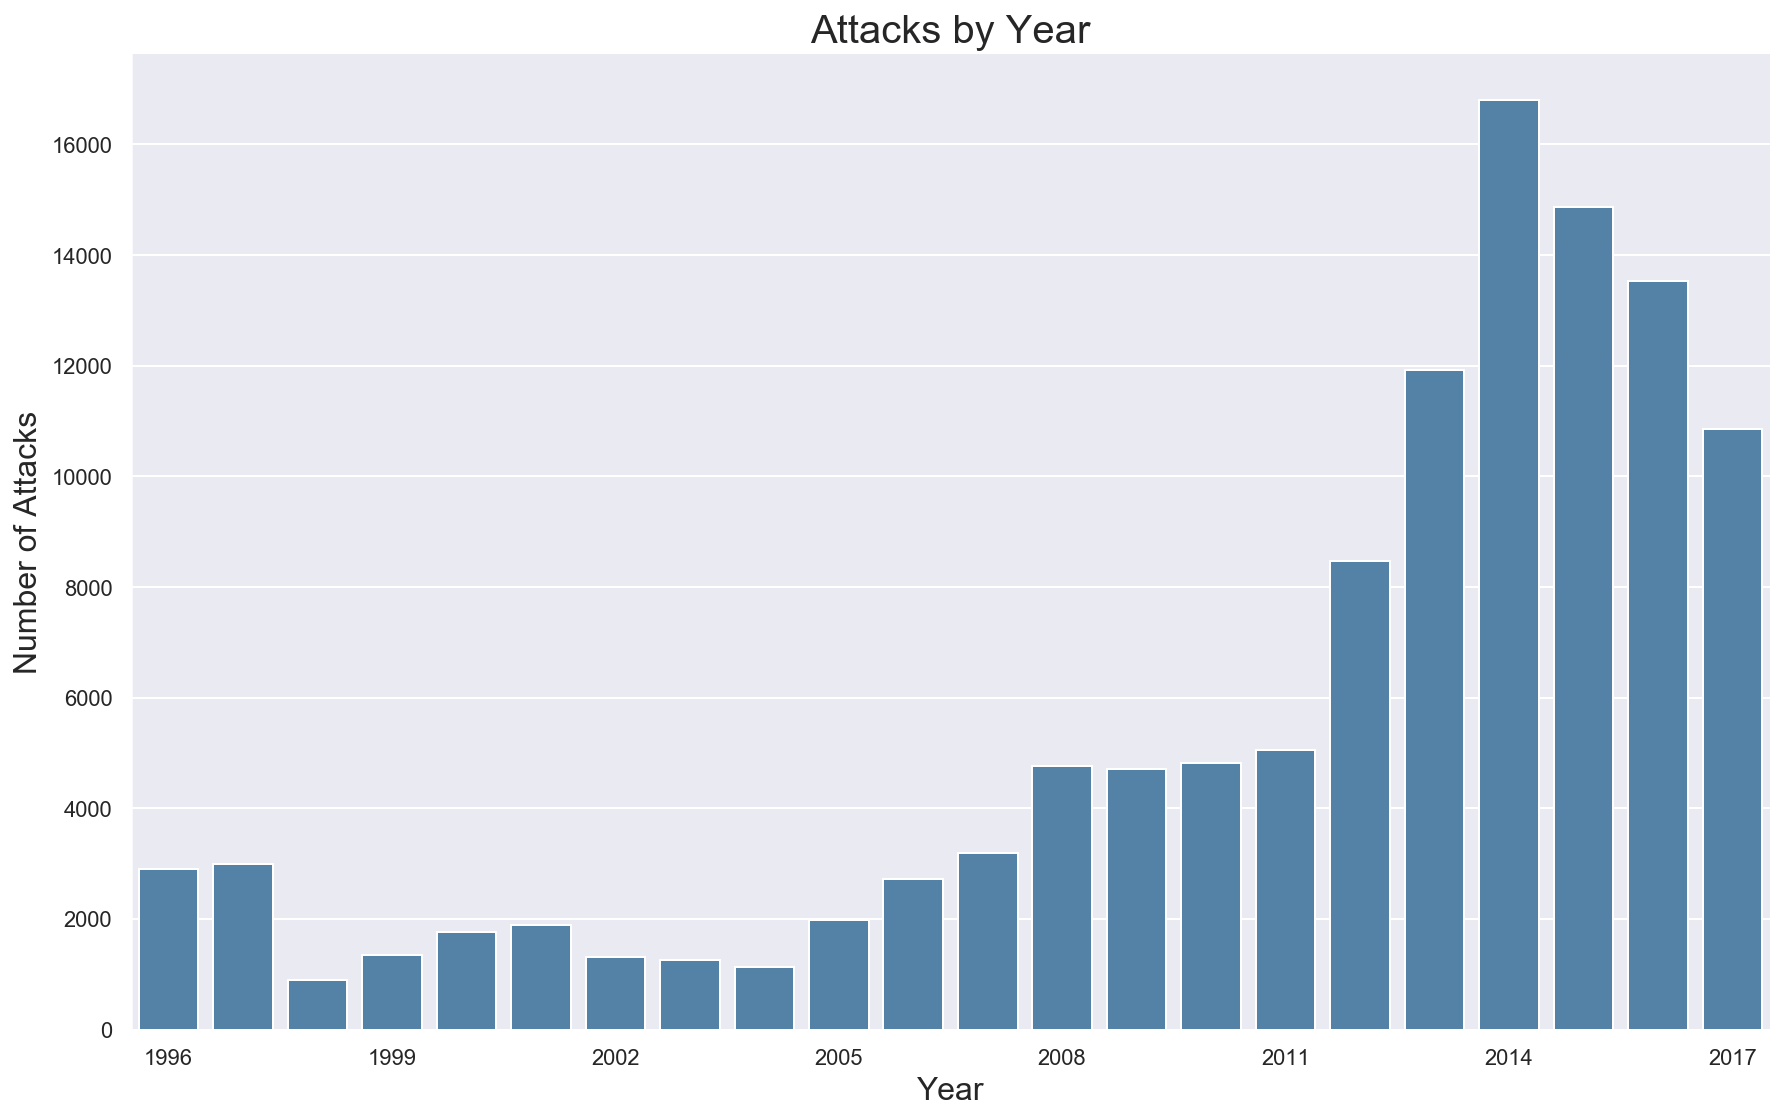

In [17]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# Make a range of years to show categories with no observations
years = np.arange(1995, 2017)

# Draw a count plot to show the number of attacks each year
plt1 = sns.catplot("iyear", data=gtd_clean, kind="count", color='steelblue', height=7.6, aspect=1.618)
plt1.set_xticklabels(step=3)
_ = plt.title('Attacks by Year', fontsize = 20)
_ = plt.xlabel('Year', fontsize = 16)
_ = plt.ylabel('Number of Attacks', fontsize = 16)
plt.show();

### Fatalities by Year
Plot the number of confirmed fatalities by year.

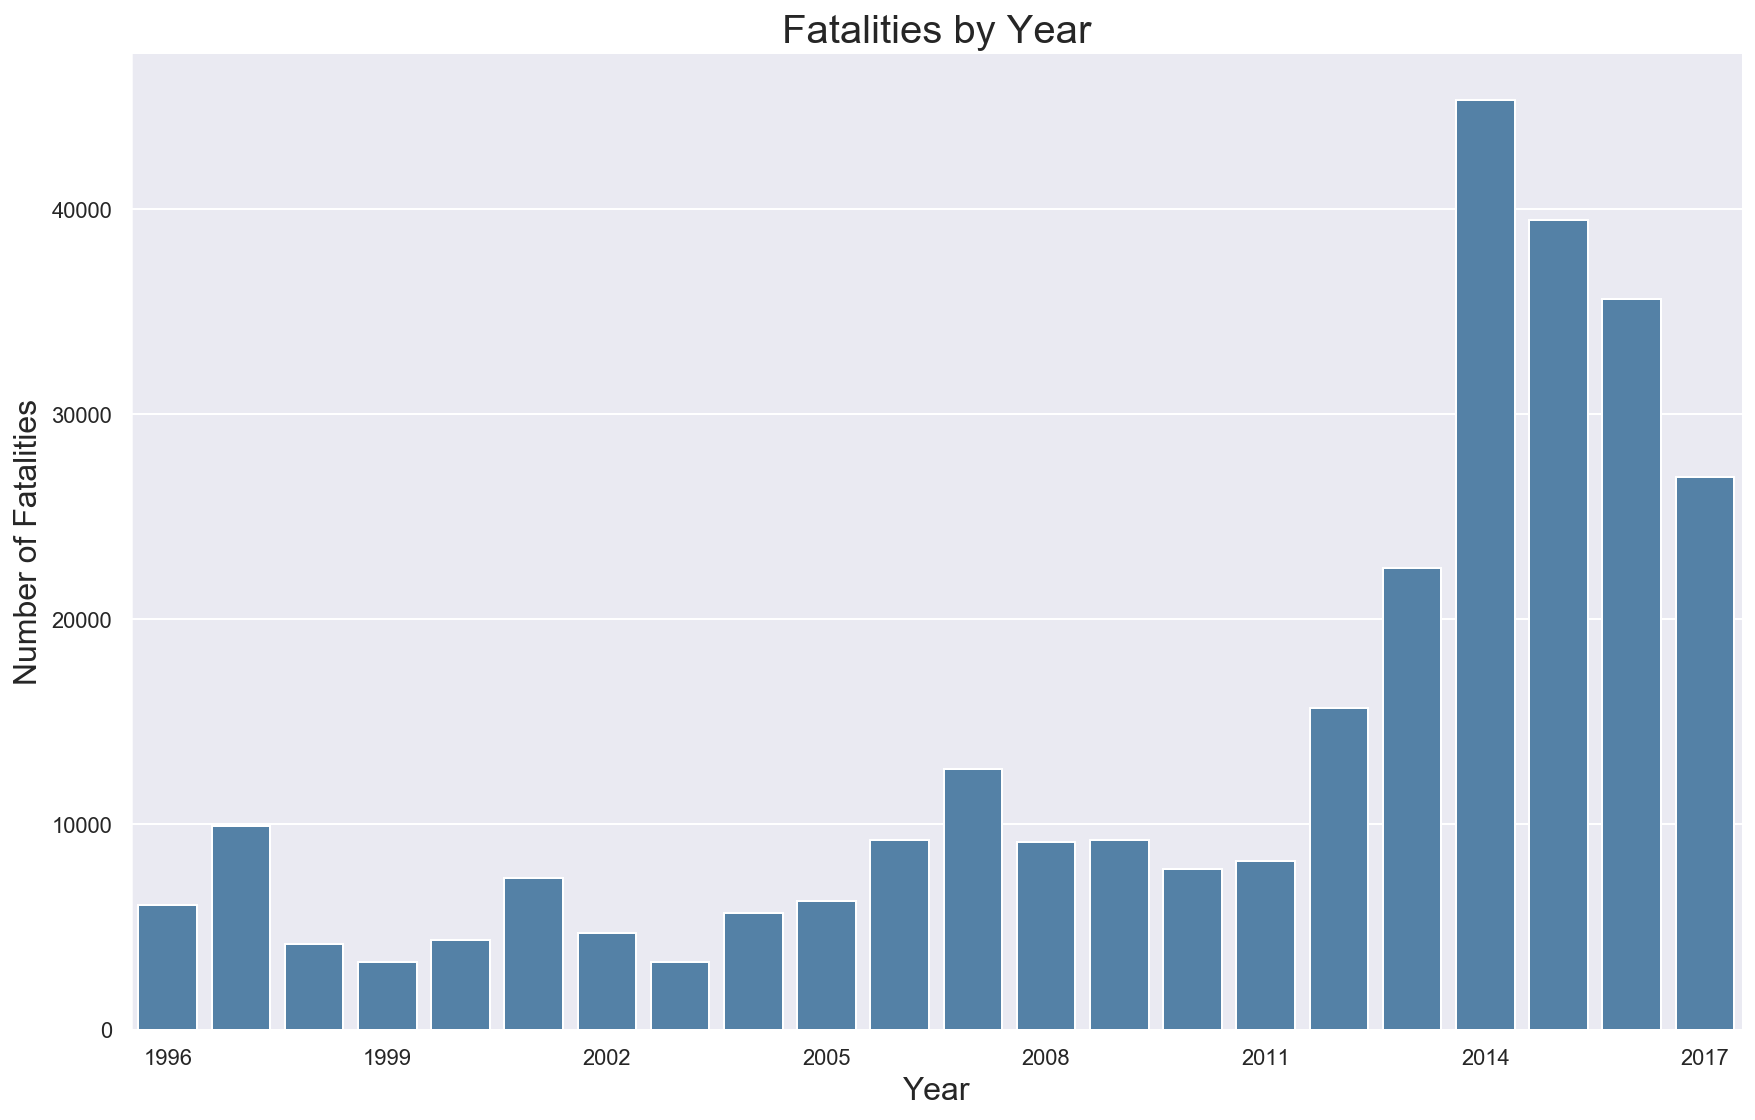

In [18]:
# Make a range of years to show categories with no observations
years = np.arange(1995, 2017)

df1 = gtd_clean[['iyear', 'nkill']]
gp1 = df1.groupby(['iyear'], as_index = False).sum()

# Draw a count plot to show the number of attacks each year
plt1 = sns.catplot(x = 'iyear', y = 'nkill', data=gp1, kind = 'bar', color='steelblue', height=7.6, aspect=1.618)
plt1.set_xticklabels(step=3)
_ = plt.title('Fatalities by Year', fontsize = 20)
_ = plt.xlabel('Year', fontsize = 16)
_ = plt.ylabel('Number of Fatalities', fontsize = 16)
plt.show();

### Attack Locations
Plot a sample of attack locations.  The sample is limited to 3,000 lat/long points due to rendering issues between the Folium package and Jupyter notebooks.

In [28]:
import folium
from folium import plugins
# Get a basic world map.
gtd_map = folium.Map(location=[30, 0], zoom_start=2)

In [29]:
# Take a sample of the data points
gtd_sample = gtd_clean.sample(3000);

In [31]:
gtd_sample

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,specificity,summary,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,nperpcap,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,scite1,dbsource,extended_txt,vicinity_txt,crit1_txt,crit2_txt,crit3_txt,doubtterr_txt,multiple_txt,success_txt,suicide_txt,guncertain1_txt,individual_txt,claimed_txt,property_txt,ishostkid_txt,INT_LOG_txt,INT_IDEO_txt,INT_MISC_txt,INT_ANY_txt,incident_date
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201204060010,2012,4,6,Afghanistan,South Asia,Helmand,Gereshk,31.825871,64.576431,1.0,04/06/2012: An explosive device detonated near...,Bombing/Explosion,Police,Police Security Forces/Officers,Afghan Police,Officers,Afghanistan,Unknown,0.0,Explosives,Landmine,2.0,0.0,0.0,0.0,0.0,0.0,"""4 Afghan police killed in the south; 7 people...",START Primary Collection,NO,NO,YES,YES,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,UKNOWN,UKNOWN,NO,UKNOWN,2012-04-06
199707210008,1997,7,21,Algeria,Middle East & North Africa,Blida,Blida,36.480453,2.833880,1.0,UNKNOWN,Armed Assault,Private Citizens & Property,Village/City/Town/Suburb,UNKNOWN,villages,Algeria,Islamist extremists,0.0,Melee,Knife or Other Sharp Object,47.0,0.0,0.0,0.0,0.0,0.0,UNKNOWN,PGIS,NO,YES,YES,YES,YES,NO,YES,YES,NO,NO,NO,UKNOWN,YES,NO,UKNOWN,UKNOWN,NO,UKNOWN,1997-07-21
201310090063,2013,10,9,Colombia,South America,Antioquia,Anori,7.074170,-75.147814,1.0,10/09/2013: Assailants stopped a bus and force...,Bombing/Explosion,Police,Police Security Forces/Officers,National Police of Colombia,Officers,Colombia,Revolutionary Armed Forces of Colombia (FARC),0.0,Explosives,Unknown Explosive Type,0.0,0.0,0.0,8.0,0.0,0.0,"""'FARC' detonates bus in northern Colombia: 8 ...",START Primary Collection,NO,NO,YES,YES,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,2013-10-09
201504010048,2015,4,1,Iraq,Middle East & North Africa,Saladin,Tikrit district,34.845033,43.862096,3.0,04/01/2015: Assailants carried out an attack n...,Unknown,Unknown,UNKNOWN,Unknown,Unknown,Iraq,Islamic State of Iraq and the Levant (ISIL),0.0,Unknown,UNKNOWN,0.0,0.0,0.0,0.0,0.0,0.0,"""Tikrit victory boosts Iraq fight to eradicate...",START Primary Collection,NO,NO,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,2015-04-01
201608080016,2016,8,8,Iraq,Middle East & North Africa,Al Anbar,Waleed,33.433811,38.922878,1.0,08/08/2016: Assailants attacked security force...,Unknown,Military,Military Checkpoint,Iraqi Armed Forces,Border Crossing,Iraq,Islamic State of Iraq and the Levant (ISIL),0.0,Unknown,UNKNOWN,5.0,0.0,5.0,0.0,0.0,0.0,"""Security forces fight IS in Iraq, as defense ...",START Primary Collection,NO,NO,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,2016-08-08
201612180005,2016,12,18,Colombia,South America,Arauca,UNKNOWN,6.547306,-71.002231,4.0,12/18/2016: Assailants opened fire on an army ...,Armed Assault,Military,Military Unit/Patrol/Convoy,Military Forces of Colombia,Patrol,Colombia,National Liberation Army of Colombia (ELN),0.0,Firearms,Unknown Gun Type,2.0,0.0,0.0,0.0,0.0,0.0,"""Two Colombian soldiers killed in ELN rebel...",START Primary Collection,NO,NO,YES,YES,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,2016-12-18
201609090048,2016,9,9,South Sudan,Sub-Saharan Africa,Eastern Equatoria,Loa,3.787898,31.982857,1.0,09/09/2016: Assailants opened fire on buses in...,Armed Assault,Transportation,Bus (excluding tourists),Unknown,Buses,South Sudan,Sudan People's Liberation Movement in Oppositi...,0.0,Firearms,Unknown Gun Type,8.0,0.0,0.0,0.0,0.0,0.0,"""Gunmen increase roadside attacks in South Sud...",START Primary Collection,NO,NO,YES,YES,YES,NO,YES,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,YES,2016-09-09
200509230003,2005,9,23,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1.0,09/23/2005: A suicide car bomber wearing an ex...,Bombing/Explosion,Transportation,Bus Station/Stop,Unknown,Unknown,Iraq,Unknown,0.0,Explosives,Vehicle,7.0,0.0,1.0,12.0,

In [36]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [65]:
locations= []
for row in gtd_sample[['latitude','longitude']].iterrows():
    locations.append([row[1][0],row[1][1]])

In [71]:
folium.CircleMarker??

In [72]:
for p in locations:
    folium.CircleMarker(location=p, radius=0.5, color='#E74C3C', 
                        fill=True,fill_color='#E74C3C').add_to(gtd_map)
    break

In [50]:
next(gtd_sample.iterrows())[1]

latitude     31.8259
longitude    64.5764
Name: 201204060010, dtype: object

In [35]:
folium.CircleMarker(gtd_sample['latitude'],gtd_sample['longitude'])

ValueError: Expected two (lat, lon) values for location, instead got: eventid
201204060010    31.825871
199707210008    36.480453
201310090063     7.074170
201504010048    34.845033
201608080016    33.433811
                  ...    
201211250005    22.210076
199908090003    36.769106
201709050004    34.363503
200801190004    35.452110
200312280001    52.069858
Name: latitude, Length: 3000, dtype: float64.

In [75]:
# # Draw markers on the map.
# for index, row in gtd_sample.iterrows():
#     folium.CircleMarker(locationlist[row[7], row[8]], radius=0.5, color='#E74C3C', 
#                         fill=True,fill_color='#E74C3C').add_to(gtd_map);

# # Save the map
# gtd_map.save("../Map.html")

In [74]:
# Show the map
gtd_map
folium.CircleMarker(locations, radius=0.5, color='#E74C3C', 
                        fill=True,fill_color='#E74C3C').add_to(gtd_map)

ValueError: Expected two (lat, lon) values for location, instead got: [[31.825871000000003, 64.576431], [36.480453000000004, 2.8338799999999997], [7.07417, -75.147814], [34.845033, 43.862096], [33.433811, 38.922878000000004], [6.547306, -71.00223100000001], [3.787898, 31.982857], [33.303566000000004, 44.371773], [5.333189, 95.927669], [30.163641, 71.402035], [33.74324, 44.623825], [33.100528999999995, 44.584492], [25.83353, 62.264784999999996], [24.522095999999998, 83.722629], [24.891115, 67.143311], [26.491840000000003, 89.526855], [37.922218, 40.184376], [9.933333, 8.883333], [4.6848849999999995, 46.622807], [-2.388611, 40.438056], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.528893, 71.056122], [35.628849, 36.458794], [34.846589, 71.097317], [31.60063, 64.369652], [34.471082, 43.525348], [30.757133000000003, 20.237541], [35.303047, 44.329933000000004], [33.571807, 44.536066999999996], [3.804192, 41.155254], [23.791275, 90.418205], [6.190087999999999, 101.797961], [16.83609, 0.592403], [32.070938, 66.145477], [13.210148, 13.906085000000001], [34.010471, 44.148235], [34.477619, 41.920773], [33.303566000000004, 44.371773], [32.867867, 13.189067000000001], [31.467463000000002, 64.092445], [18.364195000000002, 81.892418], [32.311873, 64.811084], [-38.16402, -72.903185], [6.295698000000001, 101.723701], [14.596051000000001, 120.97866599999999], [15.50167, -88.02774000000001], [-25.252089, -52.021542], [34.146668, 72.386306], [31.825871000000003, 64.576431], [33.74324, 44.623825], [26.165298999999997, 63.027649], [34.007206, 71.983078], [36.354145, 43.143570000000004], [35.375638, 43.79545], [-3.427512, 29.924253000000004], [34.221798, 36.376812], [10.857757000000001, 13.612441], [7.775413, 81.606247], [31.197585999999998, 16.586681], [32.069286, 20.151144], [33.303566000000004, 44.371773], [43.320229, 45.654491], [34.08374, 74.789902], [13.132009, 123.89088999999998], [28.549415000000003, 70.621679], [42.224159, 43.9632], [34.176874, 61.700565000000005], [2.059819, 45.326115], [7.785305, 81.427899], [34.006004, 71.53743], [34.942699, 69.262517], [54.607712, -5.95621], [6.700414, 121.97255700000001], [33.375759, 44.702866], [6.700696000000001, 101.433915], [24.891115, 67.143311], [41.890961, 12.490069], [6.072413, 121.784209], [3.926858, 41.877171000000004], [18.667220999999998, 81.671991], [10.51684, 7.433304], [32.37001, 62.12845600000001], [35.45211, 44.375465000000005], [43.511111, 44.6], [33.303566000000004, 44.371773], [31.713972, 34.649862], [33.542621999999994, 68.415329], [32.469238, 44.416637], [38.424951, 40.670409], [36.354145, 43.143570000000004], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.844273, 68.616341], [33.93573, 71.48751800000001], [61.077259999999995, 25.010789000000003], [33.542621999999994, 68.415329], [40.793352, 42.609534000000004], [-6.158373, 155.382212], [33.598633, 69.228996], [-7.472222, 112.43361100000001], [37.583333, 43.733333], [30.200819, 66.994354], [33.303566000000004, 44.371773], [7.073860000000001, -75.14591], [24.891115, 67.143311], [10.455957000000001, 12.395636999999999], [34.565494, 71.477429], [35.303047, 44.329933000000004], [33.635913, 42.828811], [35.949479, 0.450046], [34.278242999999996, 62.612239], [8.892579, 126.30030900000001], [24.891115, 67.143311], [25.409215, 85.07366999999999], [33.303566000000004, 44.371773], [32.073259, 64.833276], [33.528893, 71.056122], [33.303566000000004, 44.371773], [6.874658, 79.860483], [34.277221999999995, 35.765278], [33.036021999999996, 40.288158], [33.953167, 44.921906], [9.933333, 8.883333], [34.565494, 71.477429], [32.100204, 66.901016], [33.683499, 68.69028399999999], [31.834328000000003, 70.90905], [6.254153, 101.729605], [35.202293, 71.873006], [19.602523, -99.05142099999999], [29.333328, 66.966011], [33.542621999999994, 68.415329], [6.202025, 101.252379], [34.275942, 70.359314], [31.829721999999997, 70.597778], [34.51495, 65.285708], [25.318662, 90.440804], [28.22107, 61.215819999999994], [33.303566000000004, 44.371773], [33.435192, 43.964048], [16.800720000000002, -2.2934799999999997], [23.198102, 86.04906700000001], [33.548306, 44.415733], [16.790182, 45.299386], [36.212818, 43.379642], [34.801508, 72.757002], [12.965954, 25.025827], [33.303566000000004, 44.371773], [40.312784, -97.811986], [36.694511, 68.801575], [34.08374, 74.789902], [20.821552, 92.36731800000001], [2.059819, 45.326115], [33.303566000000004, 44.371773], [4.73538, 45.2024], [33.456459, 43.392872], [33.872341999999996, 74.900416], [12.126693, 15.0284], [31.250196000000003, 34.241279999999996], [7.4691600000000005, 124.259215], [35.88097, 43.340214], [36.354145, 43.143570000000004], [43.032888, -2.411348], [-2.949221, 25.923147], [35.422127, 74.09652700000001], [36.354145, 43.143570000000004], [24.891115, 67.143311], [31.631083, 65.742226], [24.891115, 67.143311], [19.739481, 81.25753], [36.806295, 70.104248], [32.230825, 62.920592000000006], [33.571807, 44.536066999999996], [26.158908, 90.555938], [23.135309, 91.947098], [14.740611, -91.159417], [48.721722, 38.564716], [33.303566000000004, 44.371773], [22.994711, 85.21530600000001], [43.2267, 44.770569], [-4.000079, 137.113416], [16.887781, 96.149559], [23.996872, 85.371765], [34.818084999999996, 70.353251], [33.74324, 44.623825], [36.06722, 120.382504], [6.554626, 101.52969499999999], [31.126646, 33.800865], [33.383505, 43.899868], [33.303566000000004, 44.371773], [28.836561, -105.914332], [31.585088, 65.822786], [43.774839, 41.908398], [25.985563, 85.042387], [33.515244, 36.292084], [42.952619, 46.067083000000004], [26.724409, 67.769547], [33.303566000000004, 44.371773], [43.316666999999995, 45.066666999999995], [48.346134, 38.424828000000005], [22.893682000000002, 88.247691], [24.891115, 67.143311], [48.064426, 37.673248], [43.296482, 5.36978], [33.165089, 44.349022], [36.354145, 43.143570000000004], [34.396497, 72.615832], [32.921246000000004, 70.558174], [18.256007999999998, 81.503303], [18.391134, 81.659273], [34.378471000000005, 62.141815], [55.604981, 13.003822], [33.110479, 71.091375], [2.772404, 32.288073], [32.908626, 69.74806099999999], [31.607109, 65.634674], [11.120469, 13.874139000000001], [11.974328, 8.50026], [5.172485, 5.907898], [29.897657000000002, 69.525898], [29.334103999999996, 31.204953999999997], [6.845238, 101.18161500000001], [15.5, 44.083333], [34.080389000000004, 71.224365], [33.468564, 68.763192], [36.354145, 43.143570000000004], [14.413989, 44.837418], [14.597842000000002, 44.386803], [30.510053999999997, 47.778095], [31.212225, 34.117065000000004], [34.133781, 44.221014000000004], [37.99749, 23.762728], [2.059819, 45.326115], [33.915234000000005, 71.458679], [33.038032, 40.284613], [18.610349, 81.966971], [15.749972, 44.499986], [48.344912, 39.658194], [34.535939, 44.505219], [26.217001, 50.587414], [32.927129, 66.141526], [8.980118, 79.912462], [33.7075, 71.002222], [23.791275, 90.418205], [11.199019, 29.417932], [-3.913739, 30.00655], [11.974328, 8.50026], [31.499713, 65.000854], [36.191213, 65.349871], [23.35, 91.25], [36.229574, 42.236244], [12.867085000000001, 44.981911], [34.123104, 72.46901700000001], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.31065, 44.038208000000004], [30.280606, 62.054596999999994], [35.45211, 44.375465000000005], [28.127792, 82.295006], [32.069286, 20.151144], [34.296229, 70.101264], [33.303566000000004, 44.371773], [33.491623, 67.770045], [31.601523999999998, 65.551823], [27.412924, 84.375233], [13.665, 13.880556], [47.942608, 37.505134999999996], [6.202025, 101.252379], [5.157280999999999, 8.053618], [36.269463, 43.374396999999995], [35.833056, 43.435833], [33.665374, 69.788415], [33.74324, 44.623825], [4.667128, -74.10605600000001], [8.317161, 8.850562], [24.366667, 88.6], [2.14383, 45.118061], [33.303566000000004, 44.371773], [32.658433, 44.615008], [32.363889, 64.78144300000001], [34.208416, 43.890713], [33.622576, 74.996804], [4.7996099999999995, -74.74089000000001], [0.709915, 30.063138000000002], [9.380289, 80.377], [33.498228999999995, 67.76159799999999], [6.5454989999999995, 101.2799], [33.303566000000004, 44.371773], [27.651189000000002, 83.890171], [33.417362, 43.804871], [26.846709000000004, 80.946159], [42.435269, 9.470516], [34.080556, 68.51916700000001], [7.160697, 3.34824], [34.94025, 69.254974], [34.184605, 36.424011], [19.280713000000002, 83.584336], [31.250196000000003, 34.241279999999996], [23.764425, 84.34101899999999], [10.0355, -73.23725], [35.126111, 0.445833], [2.059819, 45.326115], [14.061619, 46.914966], [0.49594399999999994, 29.459606], [35.879164, 63.675056000000005], [-23.720249, -56.499901], [36.34, 43.13], [31.557064, 64.87709], [36.705776, 68.87706], [-22.666667, -55.916667000000004], [35.79813, 43.294178], [38.552184999999994, 68.767441], [34.006004, 71.53743], [31.41667, 34.33333], [28.380661, 68.343147], [34.110325, 71.163803], [54.607712, -5.95621], [37.44511, 42.856859], [33.669689, 44.381316999999996], [33.693409, 44.796085], [17.035559, -100.062088], [31.784838, 35.224613], [32.918791, 66.14550600000001], [6.210408, 101.820757], [32.469238, 44.416637], [31.950001, 35.933331], [52.063266, -1.339323], [10.388039, 123.22066399999999], [6.297885, 7.933992], [52.50153, 13.401851], [5.52372, 5.7531669999999995], [4.37474, 18.551292], [41.106178, 28.689863], [12.825647, 44.846416], [53.361675, -6.2454849999999995], [43.2267, 44.770569], [35.45211, 44.375465000000005], [16.930414000000003, 49.365315], [42.711394, 47.638241], [8.745044, 124.77681799999999], [36.263832, 42.707668], [23.574668, 85.651084], [14.672042000000001, 120.957726], [55.751377000000005, 37.579914], [34.021103000000004, 71.287421], [-3.375828, 29.364107], [19.495566, 84.178966], [0.43595100000000003, -75.52767], [36.926913, 66.250196], [33.864799, 42.536384999999996], [33.848618, 44.522125], [32.116667, 20.066667000000002], [7.775413, 81.606247], [31.60063, 64.369652], [36.201721, 37.14352], [32.533287, 45.829453], [34.006004, 71.53743], [33.303566000000004, 44.371773], [7.072722, 124.67013200000001], [36.376823, 42.448875], [25.26786, 63.460991], [12.825647, 44.846416], [33.388054, 43.5317], [34.910931, 71.127397], [7.733107, 81.68881999999999], [36.760958, 2.863225], [10.839722, 13.021944], [34.516895, 69.14701099999999], [21.217183, 85.784604], [33.744999, 45.545615999999995], [36.769106, 3.258983], [31.6672, 64.354401], [30.084629, 31.334314000000003], [42.98542, 47.450668], [-1.183147, 29.447891], [35.119653, 44.086188], [55.751377000000005, 37.579914], [31.771599, 35.2034], [34.205141, 74.34949399999999], [34.542761999999996, 43.477478000000005], [34.08374, 74.789902], [26.983648, 87.318597], [33.542621999999994, 68.415329], [33.75245, 74.907013], [36.354145, 43.143570000000004], [33.542621999999994, 68.415329], [36.077754, 4.4628879999999995], [-3.343752, 29.391237], [6.941837, 79.861687], [6.869484, 101.250483], [33.303566000000004, 44.371773], [36.354145, 43.143570000000004], [35.488316, 43.267457], [29.548278999999997, 67.879189], [-3.19755, 30.182785], [31.784838, 35.224613], [31.17308, 34.136125], [33.303566000000004, 44.371773], [48.363186, 37.891921999999994], [33.303566000000004, 44.371773], [48.750614, 38.787846], [18.933296, 83.257264], [23.604813, 88.776955], [36.625172, 5.298243], [33.789497, 75.103386], [12.99372, 44.919445], [1.8766459999999998, 44.247901], [-1.28518, 36.821107], [54.607712, -5.95621], [32.094952, 20.268871], [34.248734000000006, 70.31126400000001], [30.922109999999996, 66.45153], [33.718056, 70.821924], [33.303566000000004, 44.371773], [6.579619, 124.75825900000001], [-4.225356, 15.25106], [15.325443, 44.211895], [33.349159, 43.784199], [35.848126, 64.24248], [24.585433, 92.58913199999999], [7.159586999999999, 124.21486100000001], [31.587415000000004, 64.373355], [-22.908278, -43.197026], [35.45211, 44.375465000000005], [34.533753000000004, 43.483738], [33.531845000000004, 68.391465], [11.274796, 49.179657], [6.410951, 101.273494], [34.621521, 43.668377], [24.891115, 67.143311], [33.303566000000004, 44.371773], [15.325443, 44.211895], [24.139169, 83.44994200000001], [36.763763, 3.055413], [3.86859, 30.222423], [55.011562, -7.3120449999999995], [29.386962, 68.026485], [26.483884000000003, 90.16544300000001], [31.212225, 34.117065000000004], [26.217001, 50.587414], [11.016667, 29.716666999999998], [33.303566000000004, 44.371773], [43.5575, 43.850833], [13.727896, 100.524124], [33.271403, 44.493660999999996], [6.088221, 121.109329], [36.313854, 36.660312], [36.575333, 3.908492], [32.983025, 75.710981], [8.633417999999999, 126.094467], [43.248554, 46.597836], [34.300959000000006, 69.8342], [14.288557999999998, 46.856584999999995], [8.589444, 80.835], [19.674167, 97.20916700000001], [0.515556, 42.073333], [-17.328769, 35.591037], [33.303566000000004, 44.371773], [22.372936, 90.337372], [26.800133000000002, 92.96717199999999], [34.365089000000005, 43.74522], [31.502407, 34.459742999999996], [30.200819, 66.994354], [11.974328, 8.50026], [12.825647, 44.846416], [5.051701, 97.318123], [34.981057, 69.62145600000001], [33.74324, 44.623825], [34.57135, 71.35120400000001], [7.660633, 126.05175700000001], [39.728352, -121.83734799999999], [25.320817, 85.12560699999999], [42.798771, 47.108715000000004], [34.070091, 72.62262], [33.818195, 70.644798], [3.115641, 43.64658], [24.45685, 88.615689], [20.146059, 92.896376], [36.183165, 43.441671], [33.303566000000004, 44.371773], [35.496533, 43.095389000000004], [36.723554, 68.86785], [34.707778000000005, 38.790234999999996], [8.555442999999999, -72.726861], [41.930607, 8.742907], [4.554515, 45.250362], [33.303566000000004, 44.371773], [-33.366238, -70.505302], [54.607712, -5.95621], [25.596757999999998, 90.71891], [33.74324, 44.623825], [23.610181, 85.279935], [33.666284999999995, 69.786029], [41.94122, 9.330645], [26.073803, 93.293463], [32.606209, 70.90862299999999], [31.704338, 35.194355], [4.63858, 28.251163000000002], [-1.17645, 29.450939], [24.798346, 93.94043], [0.651881, 29.497663], [36.354145, 43.143570000000004], [36.354145, 43.143570000000004], [33.953167, 44.921906], [-18.932017000000002, 27.761539000000003], [8.188783, 124.06941299999998], [34.194167, 69.98], [4.667128, -74.10605600000001], [34.006004, 71.53743], [4.667128, -74.10605600000001], [24.798346, 93.94043], [6.733230000000001, 101.618286], [35.048473, 71.237072], [34.144495, 69.20331], [25.195693, 86.541023], [15.325443, 44.211895], [36.201721, 37.14352], [37.246817, 43.611526], [42.672421, 21.164539], [42.418054999999995, 46.495558], [37.377382, 44.085035], [33.303566000000004, 44.371773], [19.377948999999997, 81.545622], [11.083983, 13.693092000000002], [33.811111, 71.020278], [33.998815, 71.361986], [13.464442000000002, 22.197704], [47.981646999999995, 37.762325], [19.542624, -96.913744], [35.598206, 64.76365899999999], [54.607712, -5.95621], [34.836944, 72.962222], [7.863889, 123.51388899999999], [13.586484, 44.024105], [36.354145, 43.143570000000004], [5.102361, 95.897173], [7.000661999999999, -76.26544100000001], [48.596962, 37.998298999999996], [14.802079, -1.3029309999999998], [32.460617, 35.301247], [33.303566000000004, 44.371773], [5.106041, -5.585363], [13.448279999999999, 24.815336], [36.541779999999996, 3.0810000000000004], [39.935377, 119.60049199999999], [49.658578000000006, 37.646285], [33.303566000000004, 44.371773], [33.376824, 44.702895], [35.373611, 36.601667], [55.011562, -7.3120449999999995], [15.839564999999999, 48.455301], [33.888523, 35.503513], [13.003044000000001, 14.738038000000001], [33.303566000000004, 44.371773], [33.07835, 44.254719], [33.303566000000004, 44.371773], [47.098835, 37.81987], [-4.323782, 39.572848], [15.744461, 44.071824], [33.669689, 44.381316999999996], [33.303566000000004, 44.371773], [26.143757, 50.604046000000004], [6.242026, -75.564766], [34.079925, 44.16728], [42.340892, -3.699762], [53.865467, 10.686558999999999], [15.325443, 44.211895], [34.347343, 45.383274], [2.059819, 45.326115], [34.082771, 68.761701], [32.37001, 62.12845600000001], [34.516895, 69.14701099999999], [18.364195000000002, 81.892418], [7.0580940000000005, 124.70155600000001], [32.270119, 65.049683], [34.417122, 70.44959300000001], [37.99749, 23.762728], [31.861471, 35.208427], [31.529283000000003, 35.115543], [9.528457000000001, 31.667164], [33.057990999999994, 44.354839], [31.126646, 33.800865], [23.791275, 90.418205], [34.217285, 71.56104300000001], [32.519241, 67.416481], [34.018381, 71.274945], [36.492558, 3.5749419999999996], [32.205465999999994, 64.989581], [34.08374, 74.789902], [38.061377, 23.589754], [23.831862, 91.287127], [33.303566000000004, 44.371773], [12.825647, 44.846416], [33.303566000000004, 44.371773], [33.100528999999995, 44.584492], [34.346722, 62.197315], [42.331070000000004, 9.490362], [54.607712, -5.95621], [34.69786, 70.835779], [6.565672999999999, 47.763756], [23.229357, 72.67410500000001], [43.258434, -2.9218189999999997], [32.069286, 20.151144], [33.303566000000004, 44.371773], [6.774396, 47.429031], [5.91845, 101.866362], [33.303566000000004, 44.371773], [33.974899, 71.69326], [2.619745, 44.893681], [34.006004, 71.53743], [54.208418, -5.891744999999999], [33.448207000000004, 69.041974], [18.303801999999997, 83.328549], [33.74324, 44.623825], [7.689166999999999, 9.250278], [20.37637, 82.664764], [23.727918, 86.104956], [33.460819, 44.157433000000005], [34.128723, 71.085815], [50.6206, 26.247984999999996], [5.252803, -76.825965], [24.891115, 67.143311], [30.200819, 66.994354], [24.652145, 84.575245], [-18.914872, 47.531612], [33.460819, 44.157433000000005], [36.354145, 43.143570000000004], [4.723091999999999, 6.778944999999999], [33.773348999999996, 45.14945], [31.784838, 35.224613], [3.037389, 43.796963], [33.303566000000004, 44.371773], [47.857597, 39.754063], [11.974328, 8.50026], [34.783266999999995, 70.054879], [37.440736, 42.110754], [33.818581, 70.173424], [20.200434, 81.072956], [6.270689, 101.689751], [33.671638, 73.05606800000001], [36.354145, 43.143570000000004], [33.401699, 44.357658], [6.916428, 79.867824], [35.521797, 46.183594], [35.455377, 43.121244], [3.585242, 98.675598], [6.828333, -75.513056], [36.354145, 43.143570000000004], [16.87613, 4.405685], [33.542621999999994, 68.415329], [6.517949, 101.653463], [7.168232000000001, 17.300447], [33.303566000000004, 44.371773], [36.662321, 4.079895], [32.782656, 62.673141], [32.043132, 67.27861800000001], [24.891115, 67.143311], [23.023638000000002, 85.18940400000001], [33.303566000000004, 44.371773], [35.04013, 63.290842000000005], [33.388054, 43.5317], [34.977778, 69.2225], [26.115631, 62.037643], [42.884240000000005, 41.139628], [35.19533, 43.34209], [32.08297, 34.811886], [29.362207, 19.205558], [34.72978, 71.521714], [43.338233, -1.7892720000000002], [33.74324, 44.623825], [6.05703, -75.18513], [33.273567, 35.463654999999996], [36.354145, 43.143570000000004], [4.667128, -74.10605600000001], [34.099578, 64.905955], [55.860625, 48.715725], [31.680202, 64.31221], [9.19974, -73.5433], [31.126646, 33.800865], [36.763763, 3.055413], [33.81685, 35.864236], [0.585079, 30.251272999999998], [1.7046, 44.692715], [31.834328000000003, 70.90905], [43.127544, 45.539974], [36.609351000000004, 4.7803510000000005], [33.74324, 44.623825], [29.037681, 66.581497], [36.201721, 37.14352], [10.820628999999998, 123.557071], [7.414383, 81.83063299999999], [5.548323, -75.6441], [32.686648999999996, 62.732391], [31.771599, 35.2034], [33.303566000000004, 44.371773], [36.480453000000004, 2.8338799999999997], [11.636077, 13.217856], [43.291618, -1.977903], [31.505470000000003, 74.34288000000001], [36.755626, 66.722078], [42.43843, 21.037098999999998], [28.544390000000003, 68.218002], [54.607712, -5.95621], [34.372474, 63.176251], [23.162824, 89.218142], [6.804284, 101.502075], [34.417122, 70.44959300000001], [35.409901, 36.503838], [43.75459, 44.026374], [41.890961, 12.490069], [34.093739, 44.21817], [5.31723, -75.78713], [32.069286, 20.151144], [6.171389, 7.005], [31.882193, 70.57551600000001], [14.599352, 120.98477199999999], [54.347539000000005, -6.656108000000001], [33.303566000000004, 44.371773], [11.266667, 122.53333300000001], [34.853708000000005, 69.649966], [33.303566000000004, 44.371773], [12.346257000000001, 14.184689], [9.54637, -75.31266], [17.864437, 81.40840899999999], [34.092796, 74.58959200000001], [24.798346, 93.94043], [38.667597, 40.807501], [33.671638, 73.05606800000001], [34.748931, 72.834712], [6.889578, 124.432344], [33.999938, 69.019532], [55.011562, -7.3120449999999995], [24.519673, 87.571717], [2.059819, 45.326115], [24.891115, 67.143311], [2.059819, 45.326115], [14.543970000000002, 49.12458], [31.250196000000003, 34.241279999999996], [32.37001, 62.12845600000001], [37.849762, 40.668495], [34.92485, 43.491413], [15.325443, 44.211895], [35.177378999999995, 71.476303], [37.331886, 42.185903], [18.9, 81.35], [35.182417, 43.389854], [36.857369, 34.397636], [54.080865, 36.422333], [35.844665, 43.109738], [1.803436, -75.439697], [30.200819, 66.994354], [12.881665, 13.220182999999999], [25.906267, 93.72759], [6.919328, 100.749112], [24.716345, 93.834572], [13.887402999999999, 45.863647], [33.303566000000004, 44.371773], [9.666399, 80.020477], [3.168621, 42.493322], [33.303566000000004, 44.371773], [8.903405000000001, 99.012893], [6.588388, 101.25684], [32.806111, 67.463889], [24.128611, 84.185712], [34.006004, 71.53743], [35.45211, 44.375465000000005], [-1.109193, 29.033777], [7.894195, -72.503885], [32.800575, 70.49556], [48.806767, 39.263958], [36.717083, 42.095003000000005], [36.213078, 36.769512], [31.650027, 65.650018], [43.320229, 45.654491], [44.818611, 20.468056], [32.710699, 36.26059], [33.100528999999995, 44.584492], [36.354145, 43.143570000000004], [33.789075, 70.800878], [36.480453000000004, 2.8338799999999997], [55.071135999999996, -6.513154], [36.014686, 68.634395], [27.3707, 62.3342], [6.202025, 101.252379], [6.332133, 101.025933], [51.504387, -0.140041], [11.930278, 13.243332999999998], [43.169067999999996, -2.6326549999999997], [47.498406, 19.040758], [33.697271, 71.144852], [-15.284429000000001, 35.900317], [36.746738, 36.213378999999996], [36.354145, 43.143570000000004], [36.354145, 43.143570000000004], [-7.7050529999999995, 113.99527900000001], [29.895667, 67.952363], [23.43, 84.68], [43.291618, -1.977903], [26.212746, 91.728334], [6.0221029999999995, 80.799766], [34.069953000000005, 44.860306], [2.059819, 45.326115], [33.303566000000004, 44.371773], [36.060707, 41.260052], [27.6908, 68.848587], [24.891115, 67.143311], [2.059819, 45.326115], [26.149794, 91.763931], [7.65, 125.61666899999999], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [24.663717000000002, 93.906269], [33.303566000000004, 44.371773], [6.166706, 101.911987], [2.059819, 45.326115], [35.888797, 66.352928], [33.689444, 64.85305600000001], [32.867867, 13.189067000000001], [1.746832, 40.053447999999996], [0.140132, 29.287328000000002], [33.835629, 44.247406], [53.952367, -6.539013], [34.123104, 72.46901700000001], [29.229304, 67.666223], [33.303566000000004, 44.371773], [33.895519, 68.763192], [33.303566000000004, 44.371773], [7.476727, 15.601668], [33.901485, 44.777998], [31.126646, 33.800865], [27.454065999999997, 85.725693], [31.623036, 65.05424599999999], [10.798413, 13.533106], [34.473165, 71.14116700000001], [43.2267, 44.770569], [34.396497, 72.615832], [8.611336, 124.894798], [33.953167, 44.921906], [34.933361, 43.412552000000005], [41.930607, 8.742907], [33.303566000000004, 44.371773], [33.959174, 71.574388], [37.99749, 23.762728], [31.418982, 34.607343], [30.200819, 66.994354], [37.188163, 68.905252], [26.587351, 49.984146], [31.670149, 34.575153], [22.159426999999997, 90.119766], [36.705776, 68.87706], [33.303566000000004, 44.371773], [-23.545751, -46.659943], [28.852123, 66.463623], [31.200244, 16.574795], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [31.508707, 62.700644999999994], [35.503611, 43.2325], [28.585835999999997, 77.153336], [47.498406, 19.040758], [6.242026, -75.564766], [35.015114000000004, 69.34875500000001], [36.567778000000004, 69.943333], [33.303566000000004, 44.371773], [42.98542, 47.450668], [29.035246, 69.158326], [36.354145, 43.143570000000004], [36.354145, 43.143570000000004], [31.126646, 33.800865], [23.744186, 84.504429], [5.989145, 120.95321200000001], [28.518126000000002, 81.11616], [31.95873, 5.346378], [12.639722, 8.050278], [34.205605, 74.35386700000001], [6.950561, 125.04959299999999], [33.100528999999995, 44.584492], [33.07835, 44.254719], [6.202025, 101.252379], [35.137009, 44.44664], [32.069286, 20.151144], [41.591369, 9.278311], [16.647497, -92.545467], [35.631248, 44.008559999999996], [32.853333, 68.449722], [29.554547999999997, 34.947533], [2.059819, 45.326115], [34.110325, 71.163803], [36.66655, 3.09606], [33.303566000000004, 44.371773], [24.383016, 84.023169], [31.250196000000003, 34.241279999999996], [28.974233, 80.178574], [33.781216, 70.445066], [18.442701, 1.411332], [34.110325, 71.163803], [38.178403, 41.495567], [33.688559999999995, 64.864769], [24.817544, 93.91645799999999], [19.595792000000003, 81.662228], [31.250196000000003, 34.241279999999996], [32.760422, 22.635265], [6.867792, 101.223138], [30.200819, 66.994354], [33.303566000000004, 44.371773], [47.098835, 37.81987], [36.201721, 37.14352], [32.016588, 35.068798], [34.516895, 69.14701099999999], [7.661469, -75.330292], [33.303566000000004, 44.371773], [36.621944, 3.065], [30.200819, 66.994354], [12.057186, 24.878695], [36.332778000000005, 2.301389], [26.740555999999998, 85.27305600000001], [2.973305, 45.535603], [32.069286, 20.151144], [32.667476, 69.859741], [36.354145, 43.143570000000004], [42.502066, 41.861007], [34.733517, 71.519661], [31.834328000000003, 70.90905], [36.32396, 59.556959], [36.281665999999994, 42.40361], [33.303566000000004, 44.371773], [31.573244, 64.376006], [7.192233, 124.53388799999999], [7.350826, 8.836276], [15.325443, 44.211895], [25.318662, 90.440804], [33.689552, 74.320621], [38.064584, 40.381766], [29.311745000000002, 30.837809999999998], [34.021194, 68.999535], [3.4293440000000004, -76.516037], [29.803965, 66.85099], [8.818475, 125.69826], [1.6378979999999999, -77.74520799999999], [33.19392, 44.408577], [33.057990999999994, 44.354839], [33.303566000000004, 44.371773], [24.891115, 67.143311], [6.8739539999999995, 101.234711], [2.059819, 45.326115], [24.663717000000002, 93.906269], [31.637821000000002, 64.237801], [31.126646, 33.800865], [12.359468, 14.210929], [33.931011, 75.114212], [2.14383, 45.118061], [7.699061, 123.145032], [2.059819, 45.326115], [55.011562, -7.3120449999999995], [33.057990999999994, 44.354839], [6.718611, 101.41], [48.659546999999996, 39.48214], [36.354145, 43.143570000000004], [33.349159, 43.784199], [35.906302000000004, 66.388035], [33.540672, 44.251265999999994], [33.303566000000004, 44.371773], [43.248554, 46.597836], [6.3914599999999995, 101.517296], [34.834415, 43.515133], [6.693933, 101.140079], [24.245887, 93.638413], [13.116667000000001, 11.733333], [31.631083, 65.742226], [7.248848, 125.05536799999999], [24.891115, 67.143311], [32.707739000000004, 36.564823], [7.582091999999999, 122.831373], [18.708185, 82.99166], [54.851675, -6.270189], [6.190087999999999, 101.797961], [6.538238, 44.161478], [24.615983, 94.007756], [33.702296999999994, 69.369964], [34.006004, 71.53743], [12.36559, 13.828891], [34.002579, 71.38247700000001], [33.349159, 43.784199], [32.925224, 75.135264], [6.665912, 122.154839], [31.488954, 65.857667], [30.197843, 71.467629], [41.919593, 8.737687], [0.798144, 29.897879999999997], [54.751509999999996, -5.999680000000001], [-1.611111, 29.496667], [31.126646, 33.800865], [24.021679000000002, 89.248138], [7.733107, 81.68881999999999], [34.621521, 43.668377], [33.303566000000004, 44.371773], [35.046110999999996, 40.4875], [34.14658, 71.743538], [35.516236, 24.018807000000002], [2.405815, 42.97707], [23.791275, 90.418205], [43.169067999999996, -2.6326549999999997], [12.057186, 24.878695], [31.771599, 35.2034], [34.881347999999996, 44.62513], [10.619660000000001, 7.2315949999999996], [34.458889, 43.791004], [26.336306, 88.55176], [25.465052, 85.761975], [31.307638, 34.290001000000004], [-5.492729, 143.7241], [34.285891, 74.461538], [44.802416, 20.465601], [4.667128, -74.10605600000001], [10.297885, 7.341397], [6.957222, 124.44444399999999], [10.890928, 13.627589000000002], [36.763763, 3.055413], [12.533333, 103.916667], [28.490733000000002, 65.09577900000001], [34.474128, 68.639484], [12.825647, 44.846416], [36.116667, 66.05], [6.5384199999999995, 101.27804499999999], [4.664793, 18.209546], [35.598099, 64.027336], [24.891115, 67.143311], [33.303566000000004, 44.371773], [2.059819, 45.326115], [38.374891999999996, 40.075389], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [4.667128, -74.10605600000001], [53.993846999999995, -6.396594], [51.198429, 6.695289999999999], [48.736645, 39.226653999999996], [33.057990999999994, 44.354839], [33.303566000000004, 44.371773], [33.74324, 44.623825], [58.470909999999996, 11.688867], [37.922218, 40.184376], [30.383333, 47.7], [-34.115317, 18.860585], [7.389535, 125.092564], [34.030787, 74.90541800000001], [36.354145, 43.143570000000004], [33.420947999999996, 43.295662], [33.428297, 66.21458299999999], [0.114247, 40.313637], [34.772356, 71.485773], [7.689011, 81.72946999999999], [27.708754, 85.329498], [6.063022, 121.102294], [35.485833, 43.240556], [42.98542, 47.450668], [43.248554, 46.597836], [37.52324, 65.743015], [16.268135, -0.040354], [52.90885, -8.533109], [34.369833, 63.17986], [31.126646, 33.800865], [33.057990999999994, 44.354839], [15.482072, 44.222742], [23.683161, 85.05354], [34.92485, 43.491413], [3.563828, -73.795299], [33.926586, 44.772064], [4.577569, 28.398784000000003], [6.462693, 101.122863], [15.325443, 44.211895], [33.303566000000004, 44.371773], [35.303047, 44.329933000000004], [35.499439, 43.234894], [24.798346, 93.94043], [33.303566000000004, 44.371773], [35.775783000000004, 43.57989], [33.358508, 69.859741], [35.326122, 43.780811], [34.516895, 69.14701099999999], [7.056503999999999, 124.675009], [5.803388, 125.22423500000001], [36.354145, 43.143570000000004], [31.771599, 35.2034], [-33.941849, 18.41964], [34.006004, 71.53743], [32.975433, 70.273735], [-12.283760000000001, 43.741621], [33.74324, 44.623825], [13.129726000000002, 45.385571], [19.042651, 83.71725699999999], [11.704399, 11.088539], [2.272681, 45.721653], [43.248554, 46.597836], [34.468392, 74.19073], [34.432587, 41.229725], [36.354145, 43.143570000000004], [34.481376000000004, 74.17097], [6.193876, 6.971350999999999], [33.303566000000004, 44.371773], [31.517771000000003, 64.114227], [38.400403000000004, 42.109195], [41.71706, 44.783021999999995], [25.906267, 93.72759], [8.980563, 38.757791999999995], [7.199509, 124.796982], [6.511472, 101.629609], [24.749905, 84.370896], [33.303566000000004, 44.371773], [36.991419, 35.330829], [6.54429, 101.27955], [19.60975, 84.117125], [23.791275, 90.418205], [28.210638, 84.742003], [33.14575, 75.548049], [8.123469, 123.053577], [33.303566000000004, 44.371773], [31.65, 65.65], [34.034915999999996, 36.227844], [16.687778, 98.508333], [36.192589, 44.004622999999995], [33.31065, 44.038208000000004], [-1.185569, 29.446951000000002], [16.6715, 121.5318], [35.640347999999996, 63.309293999999994], [37.99749, 23.762728], [-1.64788, 120.43861000000001], [43.254697, 76.912617], [9.834949, 118.73836200000001], [43.248554, 46.597836], [27.724359999999997, 64.80908199999999], [37.080181, 41.220196], [18.763323, 82.581805], [49.846226, 2.268329], [27.66061, 84.036568], [40.936499, 24.409477], [36.763763, 3.055413], [43.095833, 44.985278], [27.359651, 95.411996], [13.586484, 44.024105], [12.867085000000001, 44.981911], [3.312293, 43.47213], [24.891115, 67.143311], [25.49546, 90.61681999999999], [39.16659, -86.534244], [33.515244, 36.292084], [31.60063, 64.369652], [48.397492, 37.975803000000006], [25.163535, 93.01364000000001], [30.084629, 31.334314000000003], [12.404778, 6.614350999999999], [33.303566000000004, 44.371773], [33.308935999999996, 75.18226], [24.134377999999998, 90.786006], [36.201721, 37.14352], [17.617008, 121.72516200000001], [33.303566000000004, 44.371773], [27.560076000000002, 68.215714], [31.950001, 35.933331], [6.726666000000001, 101.61215200000001], [8.738157000000001, 80.477147], [4.73538, 45.2024], [36.87617, 6.909210000000001], [20.554488, 81.384601], [35.325022, 70.907124], [4.433833, -75.212797], [19.075984, 72.877656], [7.733107, 81.68881999999999], [46.480451, 30.733959999999996], [39.01737, -85.760763], [15.746904999999998, 44.52498], [10.474245, -73.243634], [33.349159, 43.784199], [34.226852, 70.193208], [6.881950999999999, 124.48393], [37.927403999999996, 41.941978000000006], [7.029344999999999, -71.429497], [24.342235000000002, 93.696489], [23.791275, 90.418205], [36.093483, 64.848938], [24.579720000000002, 88.27045], [33.542621999999994, 68.415329], [-7.159038000000001, -78.513379], [34.786739000000004, 72.011126], [2.052013, 45.27065], [34.49112, 62.6031], [2.964722, 45.512221999999994], [6.065224, 80.17725899999999], [11.195915, 49.314369], [33.74324, 44.623825], [15.00141, 45.855728000000006], [6.7330570000000005, 100.985202], [43.537163, 6.464755], [34.006004, 71.53743], [34.006004, 71.53743], [6.2675, -75.568611], [13.825022, 100.294225], [33.335258, 69.928467], [23.791275, 90.418205], [18.798304, 81.03418], [38.395649, 27.135640999999996], [43.2267, 44.770569], [7.424410000000001, 12.813479], [1.297035, -75.754603], [34.549549, 43.63452], [33.74324, 44.623825], [12.60775, 124.057775], [32.677851000000004, 61.981391], [37.831455, -122.285164], [36.763763, 3.055413], [6.538481, 5.870699], [15.66182, 43.961711], [24.663717000000002, 93.906269], [34.880926, 44.620868], [30.780207, 17.837408], [54.463367000000005, -6.328597], [2.059819, 45.326115], [32.604393, 44.007145], [31.252972999999997, 34.791462], [6.166706, 101.911987], [34.034915999999996, 36.227844], [14.599352, 120.98477199999999], [35.329201, 43.943678999999996], [30.201966, -92.045686], [32.37001, 62.12845600000001], [31.412511, 34.352024], [33.303566000000004, 44.371773], [38.395649, 27.135640999999996], [34.565494, 71.477429], [33.336110999999995, 69.981111], [36.748709999999996, 3.1924799999999998], [34.475, 70.53222199999999], [31.825871000000003, 64.576431], [26.398021999999997, 90.26941500000001], [36.1044, 42.9686], [36.780495, 68.867142], [27.981111, 30.808056], [10.286653, 11.163861], [31.583493, 63.791712], [35.567009000000006, 45.385494], [24.798346, 93.94043], [13.063399, 44.880882], [32.306098999999996, 69.57995600000001], [31.784838, 35.224613], [31.5282, 34.596382], [44.274368, 19.8911], [14.035219, 121.325442], [10.809591000000001, 28.60882], [8.973818, 80.527176], [26.102882, 62.368945999999994], [10.657034, 14.588084], [41.919593, 8.737687], [13.314836999999999, 25.088934], [32.666404, 65.90362900000001], [33.542621999999994, 68.415329], [9.8, 80.15], [28.009182, 67.84906], [25.594539, 90.25027], [14.119685999999998, 122.625722], [38.888447, 40.501144000000004], [25.999413, 63.047451], [30.200819, 66.994354], [23.791275, 90.418205], [9.559379, 22.135944], [33.528893, 71.056122], [51.339696, 12.373075], [2.059819, 45.326115], [33.420947999999996, 43.295662], [4.6848849999999995, 46.622807], [50.619294000000004, 26.251929999999998], [33.303566000000004, 44.371773], [33.721287, 74.831062], [32.850273, 66.04594], [39.563051, 44.01115], [1.114228, 44.028706], [38.675209, 39.222745], [32.867867, 13.189067000000001], [36.99154, 35.331051], [51.504387, -0.140041], [6.166706, 101.911987], [13.507695000000002, 12.92882], [34.002579, 71.38247700000001], [34.856902000000005, 71.429936], [7.116294, -73.120026], [4.792239, 8.529534], [31.5282, 34.596382], [32.861765000000005, 44.507374], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.057990999999994, 44.354839], [31.126646, 33.800865], [20.244683, 80.282758], [48.78764, 39.307635999999995], [37.252532, 65.64259799999999], [37.302221, 44.57692], [33.303566000000004, 44.371773], [43.136978000000006, -2.073914], [9.53955, 8.899702], [34.029758, 36.584045], [43.255058, 76.912628], [43.793028, 87.627812], [34.516895, 69.14701099999999], [21.973508, 96.08208], [54.400992, -5.669367], [33.303566000000004, 44.371773], [36.5725, 69.041389], [36.354145, 43.143570000000004], [36.201721, 37.14352], [35.45211, 44.375465000000005], [36.71928, 37.11557], [32.069286, 20.151144], [-3.375828, 29.364107], [35.244269, 43.566805], [29.673863, 68.715498], [26.143757, 50.604046000000004], [37.141667, 69.80444399999999], [2.059819, 45.326115], [9.539536, 8.899852000000001], [23.805920999999998, 86.41551199999999], [7.98693, 124.37839], [18.079275, -15.965107000000001], [31.212225, 34.117065000000004], [34.483333, 71.516667], [9.666399, 80.020477], [33.528893, 71.056122], [36.951634999999996, 65.126535], [32.559761, 41.919647], [31.631083, 65.742226], [36.503593, 40.740627], [32.069286, 20.151144], [34.667708000000005, 72.343515], [2.059819, 45.326115], [48.755672, 38.968559], [11.840929, 13.141459], [31.955101000000003, 35.260324], [31.212225, 34.117065000000004], [31.126646, 33.800865], [34.417122, 70.44959300000001], [30.200819, 66.994354], [24.891115, 67.143311], [11.661944, 14.02], [-1.393147, 120.754749], [12.825647, 44.846416], [1.789637, 44.529976], [12.057186, 24.878695], [8.637411, -72.73401899999999], [33.303566000000004, 44.371773], [7.11412, 124.808899], [34.006004, 71.53743], [34.208416, 43.890713], [39.930771, 32.767540000000004], [-38.948921, -72.331113], [31.631083, 65.742226], [8.0827, -72.80035], [10.482834, -66.962128], [33.683265999999996, 43.473259000000006], [31.505470000000003, 74.34288000000001], [32.666404, 65.90362900000001], [33.515244, 36.292084], [33.303566000000004, 44.371773], [53.361675, -6.2454849999999995], [34.717705, 36.722823999999996], [33.131307, 75.33810799999999], [36.354145, 43.143570000000004], [32.987347, 70.602524], [34.195751, 70.786385], [34.300682, 71.651253], [13.978889, 44.1525], [37.449746000000005, 42.856927], [33.303566000000004, 44.371773], [44.978981, 16.70372], [36.001646, 65.362895], [33.303566000000004, 44.371773], [33.888523, 35.503513], [6.015439, 101.952028], [7.233339, 124.25000800000001], [5.975499, 121.14483500000001], [36.37489, 3.9019999999999997], [28.893738, 64.405846], [34.725806, 70.135648], [54.607712, -5.95621], [33.420947999999996, 43.295662], [48.730804, 37.574596], [28.340071000000002, 68.188997], [26.223698, 50.536629], [33.1782, 68.752533], [11.840929, 13.141459], [25.799722, 88.462189], [34.125729, 45.003341999999996], [30.195354, 67.713219], [34.125729, 45.003341999999996], [48.064426, 37.673248], [33.303566000000004, 44.371773], [28.633307000000002, 69.19036899999999], [31.752651, 34.712606], [30.510479999999998, 31.345509000000003], [7.003889, -76.26438399999999], [34.516895, 69.14701099999999], [54.607712, -5.95621], [33.74324, 44.623825], [4.963686, -73.490401], [34.004337, 69.214639], [-28.747704, 30.442531], [33.318331, 43.783602], [31.631083, 65.742226], [0.466261, 29.517258], [15.456389999999999, 45.324871], [2.93303, -75.28582800000001], [33.100528999999995, 44.584492], [33.581484, 68.45795], [24.319166, 89.569266], [33.303566000000004, 44.371773], [33.375759, 44.702866], [47.981646999999995, 37.762325], [8.18027, 77.745302], [36.354145, 43.143570000000004], [34.621521, 43.668377], [36.763763, 3.055413], [6.929089, 122.07885], [34.046966999999995, 72.32885], [9.632177, 8.503456], [36.625163, 5.336067], [33.303566000000004, 44.371773], [27.862527000000004, 85.113974], [36.354145, 43.143570000000004], [35.499439, 43.234894], [37.99749, 23.762728], [51.459823, -2.536079], [34.344291, 44.468521], [23.791275, 90.418205], [33.303566000000004, 44.371773], [33.915234000000005, 71.458679], [36.70993, 67.1157], [33.663115999999995, 42.634892], [4.175278, 73.508889], [34.265707, 70.754949], [32.29097, 61.543043999999995], [33.303566000000004, 44.371773], [37.99749, 23.762728], [6.575939, 101.193588], [9.666399, 80.020477], [-29.040112, 29.77079], [6.692958999999999, 101.308488], [43.3, 45.866667], [42.699996999999996, 9.447317], [34.271034, 45.163567], [30.228035, 66.07109799999999], [30.195354, 67.713219], [16.35, 120.41666699999999], [11.3863, 12.9111], [34.479385, 68.664539], [4.950039, 8.324929], [35.244621, 44.275486], [36.354145, 43.143570000000004], [5.401898, -77.400533], [36.060909, 68.593811], [34.824757, 71.686207], [33.611455, 36.75523], [16.889359, 42.570567], [42.978225, 45.013627], [34.006004, 71.53743], [33.19392, 44.408577], [30.200819, 66.994354], [19.561327, 80.271159], [6.929089, 122.07885], [33.100528999999995, 44.584492], [24.891115, 67.143311], [4.858077, 6.9209130000000005], [34.08374, 74.789902], [34.08374, 74.789902], [-1.949011, 30.057852], [7.790106, 33.004466], [34.14658, 71.743538], [7.0179990000000005, 124.500099], [34.010471, 44.148235], [24.798346, 93.94043], [33.266693, 62.356516000000006], [33.100011, 44.583299], [61.25, 73.416667], [31.786405, 35.431532000000004], [34.438094, 35.830837], [32.929788, 66.68911800000001], [33.303566000000004, 44.371773], [31.713611, 61.6225], [37.442446000000004, 42.110997], [-4.090508, 39.647758], [34.271034, 45.163567], [13.887402999999999, 45.863647], [35.92522, 35.988251], [48.230583, 38.205082], [32.887157, 44.341637], [34.424682000000004, 70.33798399999999], [31.631083, 65.742226], [0.43595100000000003, -75.52767], [23.848101, 90.67018900000001], [30.200819, 66.994354], [33.246259, 35.5001], [33.74324, 44.623825], [13.727896, 100.524124], [34.59028, 69.761061], [8.113273, 125.607828], [27.529991, 60.58206800000001], [48.15, 17.116667], [2.297192, 45.264958], [11.655408, 13.412932000000001], [33.303566000000004, 44.371773], [34.288891, 74.46371500000001], [1.746832, 40.053447999999996], [44.818611, 20.468056], [28.032289000000002, -82.408025], [13.785793, 100.560852], [31.505470000000003, 74.34288000000001], [33.540672, 44.251265999999994], [7.744567, 126.397443], [43.124254, 46.158573], [6.175783999999999, 101.502075], [22.475775, 87.316819], [34.767228, 72.37678199999999], [6.215369, 102.06040300000001], [23.677186, 84.73939200000001], [33.551708000000005, 68.420464], [15.080921, 45.858916], [34.095217, 74.636749], [34.208416, 43.890713], [5.758643, -73.91526800000001], [31.467463000000002, 64.092445], [37.454041, 42.204366], [15.052222, 120.938056], [47.313381, 37.805458], [38.059761, 40.388604], [-0.134741, 29.248846999999998], [6.811967999999999, 101.42460600000001], [41.918890999999995, 8.737554], [33.953167, 44.921906], [53.360579, -2.830191], [14.358866, 45.449806], [33.303566000000004, 44.371773], [34.76548, 72.328087], [37.99749, 23.762728], [33.953167, 44.921906], [23.042092999999998, 88.89523299999999], [33.721287, 74.831062], [20.627222, 92.5025], [31.98845, 35.335755], [6.811972, 101.183886], [11.840929, 13.141459], [-0.532885, 34.456837], [-0.35784699999999997, 42.54665], [55.011562, -7.3120449999999995], [18.442701, 1.411332], [54.620416000000006, -6.211142], [33.349159, 43.784199], [6.085224, 101.879166], [24.897778, 91.87138900000001], [33.31065, 44.038208000000004], [26.876623, 85.809504], [31.631083, 65.742226], [34.229213, 70.193208], [34.952621, 72.331113], [1.716188, 44.768864], [33.953167, 44.921906], [35.687365, 64.293428], [24.375964, 88.599401], [39.930771, 32.767540000000004], [41.106178, 28.689863], [24.891115, 67.143311], [30.354934999999998, 66.944313], [32.760742, 21.757212], [32.899190999999995, 67.901573], [11.840929, 13.141459], [36.354145, 43.143570000000004], [36.655192, 6.0889809999999995], [32.8657, 44.21235], [14.748323000000001, 46.515254999999996], [32.09792, 34.954537], [13.586484, 44.024105], [33.528893, 71.056122], [36.62707, 6.634417999999999], [12.986789, 25.05919], [30.608471999999995, 33.617577000000004], [36.165062, 1.336673], [34.347343, 45.383274], [25.1458, 62.326556999999994], [35.088313, 71.36685], [43.5098, 46.3339], [9.925201, 78.119775], [36.729434999999995, 3.4986870000000003], [36.901587, 65.664425], [-0.35784699999999997, 42.54665], [18.739154, 7.387791], [29.483576, 60.862701], [43.314625, 45.155683], [23.129163000000002, 113.264435], [2.059819, 45.326115], [2.059819, 45.326115], [6.69309, 101.309074], [31.598149, 63.864056999999995], [33.303566000000004, 44.371773], [28.633307000000002, 69.19036899999999], [-4.133333, 29.8], [15.822218, -1.301143], [6.202025, 101.252379], [50.873793, 8.023406], [6.447739, 7.520525999999999], [32.791561, 12.489025999999999], [36.201721, 37.14352], [6.772403999999999, 101.292062], [33.915234000000005, 71.458679], [36.523095, 65.054353], [2.0721119999999997, 45.221424], [36.716667, 69.516667], [33.303566000000004, 44.371773], [33.364593, 69.793643], [43.162818, 13.71832], [32.936397, 67.762237], [11.010428, 29.712634], [28.932032, 82.900035], [30.135777, 31.269640000000003], [35.45211, 44.375465000000005], [43.258434, -2.9218189999999997], [33.671638, 73.05606800000001], [-12.61048, 13.194128], [13.373712, 123.240692], [31.914264000000003, 35.934998], [33.789497, 75.103386], [36.319386, 41.861473], [15.10336, -90.314079], [53.9, 27.566667], [41.002697, 39.716763], [33.74324, 44.623825], [0.515556, 42.073333], [44.081165000000006, -103.230889], [33.303566000000004, 44.371773], [31.506441, 34.621699], [35.831245, 67.333997], [24.798346, 93.94043], [24.798346, 93.94043], [33.420947999999996, 43.295662], [11.801364, 76.004373], [22.535522, 88.680791], [6.717959, 101.593027], [34.192504, 43.886392], [53.543564, -113.490452], [3.6166669999999996, 28.566667], [6.774396, 47.429031], [34.165506, 70.621883], [51.864245000000004, -2.238156], [13.586484, 44.024105], [6.263236, 21.198347000000002], [33.303566000000004, 44.371773], [-23.267285, -56.451678], [20.148689, 79.807611], [36.681667, 3.8475], [24.891115, 67.143311], [35.756298, 37.589465999999994], [32.867867, 13.189067000000001], [24.891115, 67.143311], [33.664353999999996, 44.373779], [33.303566000000004, 44.371773], [34.733517, 71.519661], [32.270119, 65.049683], [2.052013, 45.27065], [41.709981, 44.792998], [33.303566000000004, 44.371773], [42.955709999999996, -81.623195], [35.45211, 44.375465000000005], [1.808302, 44.695141], [33.528893, 71.056122], [18.527716, -72.33284], [2.059819, 45.326115], [32.605979999999995, 74.73078100000001], [6.254148000000001, 101.729605], [33.471866999999996, 68.648365], [15.332065, 119.979541], [11.110399000000001, 14.038569], [7.350826, 8.836276], [7.249707000000001, 16.433851], [34.004298999999996, 71.54483], [37.934957, 42.547745], [19.186766, 81.92359300000001], [47.981646999999995, 37.762325], [2.059819, 45.326115], [5.183798, 97.141575], [34.288891, 74.46371500000001], [33.730833000000004, 70.977778], [6.687595, 121.981334], [33.908578000000006, 71.07005500000001], [33.242176, 69.828067], [15.325443, 44.211895], [9.666399, 80.020477], [33.902945, 44.85817], [35.202293, 71.873006], [27.527493, 86.587979], [36.001646, 65.362895], [33.303566000000004, 44.371773], [23.791275, 90.418205], [33.303566000000004, 44.371773], [33.773348999999996, 45.14945], [43.047456, 44.665805999999996], [6.34593, -75.50811], [2.052013, 45.27065], [26.149794, 91.763931], [27.809921000000003, 66.620956], [32.264539, 68.524715], [36.354145, 43.143570000000004], [17.927142, 120.476019], [16.666667, 49.5], [34.856902000000005, 71.429936], [9.441407, 8.344623], [33.721287, 74.831062], [6.963234, -71.881599], [-33.829658, 151.117538], [34.006004, 71.53743], [54.092441, 12.099147], [6.717959, 101.593027], [32.684715000000004, 68.238403], [23.64075, 88.845205], [-1.3984290000000001, 28.815981], [9.243093, 9.711056], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [12.867085000000001, 44.981911], [34.110325, 71.163803], [17.889769, 121.869316], [34.006004, 71.53743], [24.891115, 67.143311], [31.662674, 63.01475799999999], [31.784838, 35.224613], [29.037681, 66.581497], [22.902678, 88.416893], [24.891115, 67.143311], [7.949889999999999, 124.23314099999999], [33.538588, 74.369286], [18.9, 81.35], [33.303566000000004, 44.371773], [13.182622, 30.216506], [2.059819, 45.326115], [34.837892, 72.975872], [26.673885, 92.857711], [42.98542, 47.450668], [33.874027000000005, 74.901505], [18.933338, 83.25729100000001], [-33.941849, 18.41964], [36.528557, 37.954094], [24.00995, 85.507147], [0.515556, 42.073334], [34.565494, 71.477429], [8.489578999999999, 124.651478], [31.212225, 34.117065000000004], [33.953468, 71.542061], [25.096073999999998, 85.313119], [41.919593, 8.737687], [24.891115, 67.143311], [35.928802000000005, 36.631451], [33.303566000000004, 44.371773], [15.325443, 44.211895], [36.263832, 42.707668], [6.873950999999999, 125.44951599999999], [6.929089, 122.07885], [25.078282, 87.934679], [33.388054, 43.5317], [2.34071, -77.23161999999999], [32.047646, 65.01200899999999], [3.115641, 43.64658], [33.420947999999996, 43.295662], [33.74324, 44.623825], [22.856246, 89.436787], [26.56114, 50.007], [10.243998, 123.833281], [36.820665999999996, -107.99081799999999], [-32.75076, -70.725101], [33.396633, 43.62571], [29.608364, 67.051613], [7.07786, -74.70355], [5.9583330000000005, -76.0075], [33.74324, 44.623825], [15.456389999999999, 45.324871], [36.056022999999996, 65.961548], [6.347289, 101.763777], [21.4088, 83.609535], [31.646119, 35.132209], [32.214394, 70.461159], [33.303566000000004, 44.371773], [33.806906, 69.911808], [33.909642, 74.895737], [12.978736999999999, 77.59964000000001], [65.825119, 21.688703], [31.211786, 34.151035], [29.548278999999997, 67.879189], [33.303566000000004, 44.371773], [34.110586, 74.868257], [34.677285, 72.222091], [33.515244, 36.292084], [25.389288, 68.357338], [33.303566000000004, 44.371773], [-1.6585009999999998, 29.220454999999998], [31.853561, 64.712357], [6.306567, 101.71821700000001], [40.681854, 39.125883], [13.762068, 44.140316], [33.303566000000004, 44.371773], [-31.413234999999997, 23.947478], [26.115631, 62.037643], [-24.193926, -56.558551], [12.366269, 13.828872], [33.303566000000004, 44.371773], [34.762747999999995, 43.596413], [-11.200347, 13.841625], [32.683333000000005, 68.233333], [33.515244, 36.292084], [31.192114, 34.449473], [34.097865999999996, -118.407379], [33.693946999999994, 45.067425], [9.066667, 7.483333], [25.354671, 68.283569], [5.976337, 121.223427], [2.059819, 45.326115], [30.200819, 66.994354], [32.069286, 20.151144], [35.329197, 25.138667], [6.211551, 101.820545], [2.059819, 45.326115], [6.69309, 101.309074], [23.669296, 86.151112], [33.303566000000004, 44.371773], [36.770538, 3.512263], [32.069286, 20.151144], [44.756944, 19.216110999999998], [6.929089, 122.07885], [31.197585999999998, 16.586681], [35.928802000000005, 36.631451], [18.578274, 81.518644], [6.057087999999999, 101.695444], [38.952785999999996, 41.901701], [25.651417000000002, 90.60741], [36.354145, 43.143570000000004], [33.335258, 69.928467], [43.597167999999996, 46.777225], [35.921051, 64.77454399999999], [33.303566000000004, 44.371773], [50.291965000000005, 57.210570999999995], [19.107414000000002, 81.95298299999999], [23.791275, 90.418205], [7.802510000000001, 6.732539], [32.760422, 22.635265], [36.503593, 40.740627], [31.987783, 14.575239999999999], [6.811786, 101.184389], [36.198591, 65.349432], [33.428297, 66.21458299999999], [34.705948, 43.697075], [34.316204, 43.868365000000004], [38.888447, 40.501144000000004], [16.034761, 120.95895], [3.115641, 43.64658], [26.894509000000003, 88.182847], [7.758089999999999, -76.65758000000001], [4.053391, 43.243996], [32.521721, 11.916862], [-0.791773, 29.045993], [13.413117000000002, 43.637531], [24.92754, 86.22050300000001], [34.08374, 74.789902], [34.010471, 44.148235], [3.2166669999999997, 43.200833], [35.030699, 71.354134], [41.106178, 28.689863], [48.434017, 38.221252], [31.545918, 64.100735], [48.736645, 39.226653999999996], [24.729906, 88.17060500000001], [-3.5162839999999997, 29.465241], [34.32587, 45.165485], [13.887402999999999, 45.863647], [38.579065, -121.49101399999999], [16.756932, -93.129235], [41.94122, 9.330645], [-1.265336, 36.890797], [32.126683, 75.46345600000001], [51.301524, 7.671439], [42.98542, 47.450668], [7.276111, -76.56222199999999], [35.090096, 71.762969], [31.60063, 64.369652], [14.647182999999998, 121.103012], [10.391049, -75.479426], [3.938715, 41.844707], [27.597801, 86.547641], [35.183083, 70.986575], [12.057186, 24.878695], [34.08374, 74.789902], [33.19392, 44.408577], [30.200819, 66.994354], [33.460819, 44.157433000000005], [30.200819, 66.994354], [36.046771, -86.583081], [6.979245, 124.38294099999999], [33.971565000000005, 36.661087], [34.558525, 38.293671], [32.987347, 70.602524], [1.4391479999999999, 29.843911], [28.633307000000002, 69.19036899999999], [15.325443, 44.211895], [37.494236, 42.531223], [2.059819, 45.326115], [32.116734, 70.15750899999999], [19.086906, 84.285289], [31.346964, 34.301429999999996], [31.5282, 34.596382], [47.541171999999996, 37.780678], [6.446829, 101.45220400000001], [34.785599, 72.76734499999999], [25.817624, 90.79264], [33.44462, 70.896728], [48.856644, 2.34233], [32.821244, 13.17363], [6.593021, 101.54754100000001], [31.80262, 66.324715], [34.881347999999996, 44.62513], [16.601688, 42.94059], [33.349159, 43.784199], [-22.970036, -56.54098199999999], [25.62804, 91.886491], [27.757835999999998, 84.473606], [32.069286, 20.151144], [2.059819, 45.326115], [-17.825166, 31.033509999999996], [33.349159, 43.784199], [4.439285, 6.288156], [12.168163, 123.774045], [32.760422, 22.635265], [33.14575, 75.548049], [33.303566000000004, 44.371773], [8.632983, 126.09432199999999], [-1.013578, 42.030766], [8.998507, -72.89733000000001], [34.360867, 68.840038], [33.435888, 69.03145400000001], [26.102882, 62.368945999999994], [34.717705, 36.722823999999996], [30.80162, 18.086216], [34.680833, 4.096944000000001], [38.345209999999994, -0.480995], [35.470702, 43.284372999999995], [31.834328000000003, 70.90905], [54.607712, -5.95621], [35.323789, 43.772096000000005], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.006516, 70.068253], [23.833807, 84.782531], [33.74324, 44.623825], [6.5454989999999995, 101.2799], [33.303566000000004, 44.371773], [18.190282999999997, 83.01935300000001], [38.908642, -77.015381], [31.197585999999998, 16.586681], [6.702667999999999, 101.43230600000001], [30.732662, 31.719546], [32.073333, 64.833889], [27.887384, 65.438539], [31.507192, 34.634099], [33.303566000000004, 44.371773], [34.548842, 73.35011999999999], [36.354145, 43.143570000000004], [34.085258, 42.360344], [31.126646, 33.800865], [31.5282, 34.596382], [5.316667, -4.033333], [33.74324, 44.623825], [6.517949, 101.653463], [36.73914, 3.901676], [16.185176000000002, 44.393366], [0.869892, -73.84190600000001], [33.433811, 38.922878000000004], [56.946203000000004, 24.104287], [33.11829, 35.139866], [32.314021999999994, 70.733963], [29.877862, 69.200424], [24.68226, 94.046121], [21.291422, 99.606854], [4.577569, 28.398784000000003], [37.966024, 23.663207], [10.4, 6.616667], [16.576572, 43.093524], [32.069286, 20.151144], [0.278097, 41.248627], [34.356659, 72.075523], [10.241977, 6.2523290000000005], [31.186065999999997, 34.008556], [54.50853000000001, -6.763131], [3.409242, 33.368649], [26.660531, 91.358867], [31.834328000000003, 70.90905], [31.631083, 65.742226], [2.784001, 45.075144], [35.46979, 44.396337], [0.48927200000000004, 29.450378000000004], [32.926684, 69.920086], [43.320229, 45.654491], [-33.366238, -70.505302], [24.342699, 87.445176], [33.420947999999996, 43.295662], [33.303566000000004, 44.371773], [15.325443, 44.211895], [33.542621999999994, 68.415329], [7.993056, 124.344167], [13.586484, 44.024105], [32.925224, 75.135264], [34.034915999999996, 36.227844], [31.761470000000003, 64.62142800000001], [32.373416, 62.110246], [51.924215999999994, 4.481776], [33.303566000000004, 44.371773], [32.760422, 22.635265], [34.869942, 62.508570999999996], [33.303566000000004, 44.371773], [31.771599, 35.2034], [31.950001, 35.933331], [42.416216999999996, 46.494561], [54.554345, -6.025275], [32.492477, 74.53104], [32.777344, 44.289352], [33.542621999999994, 68.415329], [32.760422, 22.635265], [33.457122999999996, 43.471428], [26.990484000000002, 64.08931], [1.789637, 44.529976], [34.057114, 44.218292], [33.74324, 44.623825], [3.926858, 41.877171000000004], [6.41871, 121.972443], [6.153543, 101.913039], [36.194027, 43.559466], [29.531969, 35.007061], [0.6968770000000001, 29.519696999999997], [17.554939, 44.232357], [19.452438, 81.25188299999999], [23.635816000000002, 88.77570899999999], [34.846589, 71.097317], [36.889477, 68.361082], [6.015231, 101.952085], [7.114167, 125.045278], [36.376823, 42.448875], [32.975433, 70.273735], [6.928333, 125.17638899999999], [18.391134, 81.659273], [34.92485, 43.491413], [6.942258, 124.419824], [34.296504, 70.214648], [2.7772639999999997, 45.500640999999995], [-8.55902, 125.578194], [-7.7050529999999995, 113.99527900000001], [34.016389000000004, 44.145278000000005], [34.674865999999994, 70.21344], [11.840929, 13.141459], [54.999061, -6.332559], [25.326549, 90.55424599999999], [53.354779, 83.76978299999999], [33.303566000000004, 44.371773], [39.888923999999996, 44.001294], [16.889167, 42.561111], [31.784838, 35.224613], [8.404581, 81.312434], [33.303566000000004, 44.371773], [2.059819, 45.326115], [36.098459000000005, 64.864461], [40.697132, -73.931351], [13.55, -7.45], [24.891115, 67.143311], [31.623036, 65.05416899999999], [43.291618, -1.977903], [33.590603, 71.44062], [6.491822, 101.3885], [27.708754, 85.329498], [30.383333, 47.7], [48.581534999999995, 39.355545], [32.640755, 65.570785], [54.863117, -6.2783430000000005], [24.827876999999997, 92.791976], [25.039873, 66.891581], [6.867858999999999, 101.25206800000001], [33.303566000000004, 44.371773], [26.469478000000002, 89.804903], [27.244489, 86.44037900000001], [32.989724, 70.603833], [7.0139830000000005, 100.471242], [3.828479, 43.24805], [24.197485, 88.83710500000001], [33.44826, -112.075774], [34.774479, 72.364052], [-4.419493, 29.718809999999998], [34.516895, 69.14701099999999], [6.700019, 124.733333], [-33.516667, -70.766667], [34.881347999999996, 44.62513], [6.433758, 80.000725], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.349159, 43.784199], [6.900013, 124.516554], [6.64982, 122.133453], [32.069286, 20.151144], [18.770873, 98.96540300000001], [24.128611, 84.185712], [0.515556, 42.073334], [34.154213, 41.572376], [27.727839000000003, 85.37820699999999], [33.303566000000004, 44.371773], [23.544987, 89.17260300000001], [32.806169, 67.463926], [33.426758, 44.228072999999995], [33.664906, 71.53290600000001], [33.796459000000006, 71.558487], [6.856667, 7.3958330000000005], [36.319386, 41.861473], [2.059819, 45.326115], [23.03, 72.58], [53.716083999999995, -6.350156], [36.860175, 68.30184399999999], [36.607971, 37.632305], [24.891115, 67.143311], [34.621521, 43.668377], [33.688122, 69.526124], [42.883333, 47.633333], [39.930771, 32.767540000000004], [1.114228, 44.028706], [36.201721, 37.14352], [16.934746, 43.76484], [6.926947999999999, -68.524715], [10.652892999999999, -72.923999], [8.324973, 81.30074], [10.516667, 7.433333], [33.303566000000004, 44.371773], [32.823055, 70.783745], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [23.791275, 90.418205], [36.15037, 43.253710999999996], [8.819972, 4.970821], [33.965278000000005, 69.075], [34.021194, 68.999535], [7.201288000000001, 35.420773], [18.442701, 1.411332], [32.147711, 67.087097], [33.548306, 44.415733], [54.463367000000005, -6.328597], [38.504135999999995, 43.375265], [32.654751, 44.408989], [32.354408, 67.257683], [-0.11746, 42.563808], [42.98542, 47.450668], [33.697271, 71.144852], [32.867867, 13.189067000000001], [2.059819, 45.326115], [30.047068, 31.130505], [-9.284431, 28.327164], [36.201721, 37.14352], [22.636352, 110.16511200000001], [31.623036, 65.05424599999999], [7.151389999999999, 124.81583], [34.346722, 62.197315], [37.99749, 23.762728], [30.608471999999995, 33.617577000000004], [32.468399, 14.567225], [6.013915, 101.950233], [33.74324, 44.623825], [34.365089000000005, 43.74522], [-12.622925, -73.087749], [11.151905000000001, 12.758704], [27.198889, 60.684349], [31.833346999999996, 70.901894], [32.069286, 20.151144], [13.467315, 23.29372], [34.417122, 70.44959300000001], [31.214771999999996, 34.47893], [30.200819, 66.994354], [18.629994, 82.97198399999999], [32.441399, 62.063667], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [31.412511, 34.352024], [43.2267, 44.770569], [34.774479, 72.364052], [33.303566000000004, 44.371773], [33.153987, 62.144217000000005], [24.372246, 88.894199], [33.74324, 44.623825], [43.320229, 45.654491], [23.001478, 84.58674], [36.212818, 43.379642], [37.190894, 40.58464], [33.303566000000004, 44.371773], [24.798346, 93.94043], [31.530243, 35.094162], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [33.955875, 71.496696], [41.106178, 28.689863], [33.303566000000004, 44.371773], [8.002912, 124.26825], [11.558831, 104.917445], [52.50153, 13.401851], [33.644991, 75.01803100000001], [24.798346, 93.94043], [32.066573999999996, 64.858963], [8.465677000000001, -13.231723], [5.95214, 101.712705], [14.326654999999999, 47.447216], [32.975433, 70.273735], [33.303566000000004, 44.371773], [33.62235, 44.59332], [48.273928000000005, 38.610095], [36.266667, 2.2166669999999997], [32.760422, 22.635265], [24.891115, 67.143311], [47.981646999999995, 37.762325], [6.929089, 122.07885], [11.748845, 11.965346], [33.773598, 45.14945], [43.2267, 44.770569], [33.303566000000004, 44.371773], [27.466709, 83.786174], [6.497656, 124.849655], [31.126646, 33.800865], [30.345996999999997, 48.287136], [34.643368, 71.026005], [35.324825, 43.766921999999994], [7.060051, -73.853115], [25.193491, 90.634631], [34.030549, 71.664907], [6.458927, 3.3877330000000003], [33.07835, 44.254719], [36.354145, 43.143570000000004], [2.059819, 45.326115], [33.349159, 43.784199], [-0.453142, 39.645464000000004], [2.059819, 45.326115], [4.71854, -74.92843], [33.303566000000004, 44.371773], [30.922109999999996, 66.45153], [30.197843, 71.467629], [4.53581, -76.10659], [32.850239, 66.05005899999999], [30.510053999999997, 47.778095], [54.684823, -5.965868], [34.006004, 71.53743], [31.623036, 65.05424599999999], [23.791275, 90.418205], [22.849657999999998, 91.39381], [9.937655, 122.828535], [33.07835, 44.254719], [34.006004, 71.53743], [37.514976000000004, 42.458445000000005], [7.869831, 122.55857900000001], [33.303566000000004, 44.371773], [2.557646, 32.356803], [33.877221999999996, 44.959167], [38.064584, 40.381766], [33.74324, 44.623825], [36.354145, 43.143570000000004], [37.2487, 42.471357], [16.179182, 44.039065], [26.149794, 91.763931], [7.083241, 125.600998], [32.100204, 66.901016], [2.63807, 45.373903000000006], [54.99593, -6.87742], [54.607712, -5.95621], [31.60063, 64.369652], [17.551547, -99.500648], [34.746611, 113.625355], [33.303566000000004, 44.371773], [6.254153, 101.729605], [36.503593, 40.740627], [0.515075, 42.075706], [32.394904, 64.48309499999999], [24.579715, 88.27073299999999], [42.443597, 46.549618], [13.453056, -16.5775], [33.598633, 69.228996], [48.851688, 37.613808], [32.294722, 44.639722], [6.783539, 9.069549], [5.976474, 116.11577700000001], [16.961956, 43.743219], [33.826254, 35.894453999999996], [11.184142, 29.395218], [34.229213, 70.193208], [7.0273449999999995, -71.428555], [26.657086, 91.912479], [14.358866, 45.449807], [35.329201, 43.943678999999996], [25.085708, 83.935199], [36.354145, 43.143570000000004], [33.778175, 76.576171], [28.458421, 68.133223], [7.946283, -72.89880699999999], [31.502407, 34.459742999999996], [42.880888, 20.867213], [34.591139, 68.95694], [33.559344, 67.999509], [33.303566000000004, 44.371773], [38.141496999999994, 41.011491], [32.61797, 65.872375], [33.349159, 43.784199], [1.2077870000000002, -77.2772], [33.303566000000004, 44.371773], [30.200819, 66.994354], [13.586484, 44.024105], [30.689888, 33.622741999999995], [31.621111, 65.60194399999999], [34.516895, 69.14701099999999], [2.059819, 45.326115], [32.306098999999996, 69.57995600000001], [22.588555, 85.64175300000001], [22.933332999999998, 97.75], [12.666194, 108.038248], [7.83372, -72.474228], [32.867008, 44.220455], [25.044537, 66.874672], [-4.457827, 137.122554], [36.354145, 43.143570000000004], [33.594013000000004, 73.06907700000001], [11.974328, 8.50026], [34.866207, 71.526382], [35.847119, 65.23884], [4.667128, -74.10605600000001], [55.011562, -7.3120449999999995], [28.598889, 68.29722199999999], [26.424899, 90.972415], [34.208416, 43.890713], [32.559761, 41.919647], [36.769721999999994, 68.78], [33.420947999999996, 43.295662], [35.45211, 44.375465000000005], [21.973508, 96.08208], [33.029167, 75.080556], [33.446882, 65.38071], [34.910931, 71.127398], [25.162086, 84.73025], [39.141999999999996, 43.913999999999994], [31.138931, 17.046944], [18.894734, 80.19371899999999], [31.821444, 34.665169], [15.635556, 44.323889], [33.303566000000004, 44.371773], [24.704644000000002, 93.854069], [32.100204, 66.901016], [29.262958, 77.938764], [10.195424000000001, -73.972736], [36.354145, 43.143570000000004], [34.430986, 35.835675], [25.068355, 84.01384300000001], [34.76086, 42.804933], [34.346722, 62.197315], [32.760422, 22.635265], [28.545323, 68.263207], [33.303566000000004, 44.371773], [36.158558, 43.2551], [33.100528999999995, 44.584492], [51.504387, -0.140041], [50.43225, -3.6857010000000003], [33.303566000000004, 44.371773], [34.526179, 74.254614], [33.843471, 35.498738], [33.287345, 44.319487], [7.766389, 123.275833], [32.493683000000004, -116.95295], [3.1440330000000003, 43.469633], [33.303566000000004, 44.371773], [33.403057000000004, 43.911865], [34.621521, 43.668377], [33.349159, 43.784199], [-0.35784699999999997, 42.54665], [34.516895, 69.14701099999999], [35.88097, 43.340214], [33.262805, 68.57174599999999], [8.474003, 126.118471], [33.542621999999994, 68.415329], [36.488378000000004, 65.7903], [29.583012, 65.991043], [15.325443, 44.211895], [32.554761, 67.04007], [10.266759, 13.284566], [43.265982, -2.4971919999999996], [30.200819, 66.994354], [15.325443, 44.211895], [33.303566000000004, 44.371773], [24.294992999999998, 93.28975], [33.303566000000004, 44.371773], [32.982933, 44.361595], [34.458684000000005, 43.795649], [6.597899000000001, 101.564362], [23.980898999999997, 97.978359], [31.907140999999996, 35.198219], [8.577826, 81.218719], [2.343554, -77.231537], [30.200819, 66.994354], [9.82916, -75.12191999999999], [41.400635, 2.150913], [13.491667000000001, 7.096389], [41.918890999999995, 8.737554], [34.417122, 70.44959300000001], [33.303566000000004, 44.371773], [29.64412, 67.81665699999999], [31.611913, 65.681167], [59.44269, 24.753197], [33.971944, 68.992778], [33.345259999999996, 68.163135], [24.031305, 89.406814], [35.598206, 64.76365899999999], [32.553453999999995, 75.113443], [32.069286, 20.151144], [36.354145, 43.143570000000004], [43.6753, 45.1277], [23.67645, 90.509489], [47.981646999999995, 37.762325], [48.566666999999995, 38.65], [31.201562, 64.035792], [34.006004, 71.53743], [12.89985, 23.47687], [-14.130054000000001, 14.49915], [32.867867, 13.189067000000001], [33.840956, 69.95164100000001], [43.427011, 46.087993], [32.073238, 23.944855], [33.303566000000004, 44.371773], [33.744999, 45.545615999999995], [32.625483, 62.482928], [6.202025, 101.252379], [38.353182000000004, 38.32083], [31.197585999999998, 16.586681], [36.354145, 43.143570000000004], [1.211756, 30.177308], [6.168865, 101.181128], [24.716082, 93.835314], [28.306798999999998, 66.336894], [22.192266, 113.54763100000001], [23.489248, 91.008364], [32.608878999999995, 35.289967], [8.496623, 4.5481110000000005], [31.784838, 35.224613], [15.599274, 32.513031], [32.816136, 67.762998], [33.303566000000004, 44.371773], [2.206874, -76.497229], [2.146111, 31.811111], [32.04298, 42.254261], [32.608878999999995, 35.289967], [3.821611, -76.52225200000001], [33.349159, 43.784199], [5.3417650000000005, -74.237861], [38.461126, 40.401272999999996], [33.100528999999995, 44.584492], [9.599653, 41.856311], [33.669689, 44.381316999999996], [34.006004, 71.53743], [36.354145, 43.143570000000004], [24.891115, 67.143311], [33.303566000000004, 44.371773], [36.158558, 43.2551], [24.452648999999997, 93.979089], [33.741389, 62.267778], [18.391012, 81.656929], [33.303566000000004, 44.371773], [12.99413, 25.09456], [11.274796, 49.179657], [32.393762, 72.253046], [15.40347, 120.60083999999999], [20.237556, 84.27001800000001], [33.303566000000004, 44.371773], [36.031909000000006, 66.220324], [32.069286, 20.151144], [6.932714, 124.33091499999999], [34.036444, 70.573715], [1.8766459999999998, 44.247902], [33.339698, 43.666421], [33.908508000000005, 71.473129], [37.99749, 23.762728], [33.908508000000005, 71.473129], [37.339386, -121.89495600000001], [62.63227, 17.940870999999998], [32.032916, 44.399648], [26.093312, 65.47645], [33.303566000000004, 44.371773], [6.700696000000001, 101.433915], [32.08297, 34.811886], [25.480142, 91.389342], [10.885618, 11.51486], [7.131202, -73.124973], [24.891115, 67.143311], [33.697271, 71.144852], [33.397812, 43.706276], [34.433601, 35.845879], [33.515244, 36.292084], [6.130529, -5.9463669999999995], [3.6071129999999996, 28.562289], [12.825647, 44.846416], [33.457122999999996, 43.471428], [6.700696000000001, 101.433915], [24.779318, 93.968908], [24.9282, 91.96900699999999], [7.351571000000001, 8.837643], [54.855103, -5.811254], [32.606209, 70.90862299999999], [28.005136, 84.715882], [11.115472, 13.934921], [9.533333, 8.7], [14.306435, 44.079295], [41.387174, 9.159269], [-0.35784699999999997, 42.54665], [2.9383529999999998, -73.208333], [31.733333000000002, -106.483333], [35.400169, 0.139852], [33.036390000000004, 40.283332], [18.20857, 82.103346], [10.482834, -66.962128], [32.456143, 35.261709], [20.327778, 80.470833], [6.862806, 124.443649], [36.354145, 43.143570000000004], [6.46052, -71.72989], [34.35005, 68.240152], [7.921328, 81.52467], [33.303566000000004, 44.371773], [-0.35784699999999997, 42.54665], [5.636518, 5.964841000000001], [24.891115, 67.143311], [34.652951, 70.189658], [31.509326, 65.81418199999999], [34.217285, 71.56104300000001], [33.303566000000004, 44.371773], [41.467597, 12.9037], [28.458421, 68.133223], [55.751377000000005, 37.579914], [34.516895, 69.14701099999999], [33.303566000000004, 44.371773], [7.888747, 7.908966], [33.858013, 35.5364], [9.051115, 125.899608], [34.14658, 71.743538], [23.170472, 85.591139], [4.815554, 7.049844], [33.303566000000004, 44.371773], [35.45211, 44.375465000000005], [31.547778000000005, 65.454167], [28.513790000000004, 69.12302], [11.916667, -72.0], [15.670979, 0.502872], [31.803333000000002, 66.323611], [54.864521999999994, -5.8376589999999995], [35.206666999999996, 8.682777999999999], [34.086149, 74.515567], [33.843471, 35.498738], [31.834328000000003, 70.90905], [32.069286, 20.151144], [10.867475, 12.975405], [36.763763, 3.055413], [6.700696000000001, 101.433915], [36.354145, 43.143570000000004], [33.318766, 44.415482], [54.607712, -5.95621], [37.330073999999996, 43.526169], [8.86656, 80.5093], [33.303566000000004, 44.371773], [2.299619, 45.799469], [32.069286, 20.151144], [35.21465, 44.15453], [48.581534999999995, 39.355545], [22.372936, 90.337372], [11.974328, 8.50026], [35.871435, 128.60144499999998], [20.81531, 92.399376], [33.038056, 40.284444], [34.856902000000005, 71.429936], [11.840929, 13.141459], [13.129726000000002, 45.385571], [34.125729, 45.003341999999996], [37.2487, 42.4713], [32.793921000000005, 34.990615000000005], [32.37001, 62.12845600000001], [33.375759, 44.702866], [33.303566000000004, 44.371773], [33.303566000000004, 44.371773], [-8.41825, 20.738492], [24.579342999999998, 88.267296], [31.505470000000003, 74.34288000000001], [34.853256, 63.488402], [6.794367, -71.771549], [36.354145, 43.143570000000004], [25.019455999999998, 88.27744], [36.354145, 43.143570000000004], [35.208863, 71.525189], [6.2675, -75.568611], [31.505470000000003, 74.34288000000001], [6.717959, 101.593027], [7.784172, 122.58328200000001], [34.516895, 69.14701099999999], [7.172751, 124.22966399999999], [8.757816, 80.48790699999999], [48.694492, 38.50779], [7.885051, 124.16620900000001], [36.569004, 6.578187], [33.692556, 69.376878], [33.671638, 73.05606800000001], [6.085224, 101.879166], [33.303566000000004, 44.371773], [37.30012, 44.571408], [54.607712, -5.95621], [17.054348, -96.71295400000001], [2.059819, 45.326115], [33.303566000000004, 44.371773], [33.31065, 44.038208000000004], [33.278524, 68.871685], [48.643559, 39.2234], [34.215061999999996, 71.023413], [1.61456, -75.6053], [16.431822, 45.602888], [33.625652, 44.832838], [33.303566000000004, 44.371773], [34.371916999999996, 71.635014], [2.059819, 45.326115], [20.821631, 92.366824], [25.949522, 90.212967], [33.542621999999994, 68.415329], [28.490733000000002, 65.09577900000001], [9.54751, 31.649514], [12.937959, 24.424238], [18.391012, 81.656929], [8.135081, 125.137957], [34.08374, 74.789902], [6.453015, 101.348381], [12.046389, 14.480832999999999], [23.744889999999998, 84.49698199999999], [15.462475, 45.323565], [3.888318, -77.06756], [33.693946999999994, 45.067425], [11.655408, 13.412932000000001], [6.867004, 124.46439299999999], [31.761470000000003, 64.62142800000001], [48.736645, 39.226653999999996], [32.475288, 62.202118000000006], [34.002579, 71.38247700000001], [14.064210999999998, 121.32333700000001], [34.057114, 44.218292], [36.266667, 2.2166669999999997], [35.489090999999995, 43.235535], [35.99353, 43.21973], [2.059819, 45.326115], [27.089918, 88.377346], [33.515244, 36.292084], [6.941837, 79.861687], [32.074078, 66.141526], [32.069286, 20.151144], [8.470146000000002, -73.337007], [47.541171999999996, 37.780678], [33.349159, 43.784199], [33.693946999999994, 45.067425], [6.697342999999999, 125.082779], [34.395677, 74.25388000000001], [13.799279, 22.533316], [33.303566000000004, 44.371773], [10.83642, 12.7705], [19.563254999999998, -99.038382], [32.627893, 65.878367], [33.254428000000004, 35.54246], [38.674816, 39.222515], [33.375759, 44.702866], [33.165, 75.503056], [37.942925, 23.646845000000003], [24.208285999999998, 84.86605], [11.24944, 13.999003], [14.543970000000002, 49.12458], [34.08374, 74.789902], [35.326122, 43.780811], [31.25712, 65.620797], [30.596491999999998, 32.271459], [11.840929, 13.141459], [34.516895, 69.14701099999999], [32.069286, 20.151144], [5.742724, 20.053681], [37.420683000000004, 41.350359000000005], [37.415294, 44.110774], [46.482039, 30.72905], [43.222177, -2.885668], [6.189833999999999, 80.095394], [31.241078, 32.240958], [31.763582, 35.257721999999994], [35.260414000000004, 36.383117999999996], [7.733107, 81.68881999999999], [54.663392, -5.917475], [26.972136, 64.114571], [44.756944, 19.216110999999998], [41.890961, 12.490069], [-1.503047, 29.634797999999996], [31.631083, 65.742226], [3.1517209999999998, 42.489719], [28.632996000000002, -106.0691], [35.672932, 44.070145000000004], [28.3898, 68.190838], [32.069286, 20.151144], [33.7, 45.083333], [34.006004, 71.53743], [32.548041999999995, 41.919794], [42.84964, -2.692359], [33.303566000000004, 44.371773], [34.516895, 69.14701099999999], [15.515888, 45.449806], [24.502222, 85.00694399999999], [36.769106, 3.258983], [42.646663000000004, 41.914019], [6.190087999999999, 101.797961], [6.957063000000001, -71.088624], [33.303566000000004, 44.371773], [6.5454989999999995, 101.2799], [15.325443, 44.211895], [34.870552, 36.6525], [32.860988, 44.221344], [33.395906, 43.667393], [33.879987, 74.92794599999999], [2.059819, 45.326115], [39.799948, 42.6768], [29.143866, 69.099785], [7.39035, 126.029766], [15.799444, 44.246389], [2.059819, 45.326115], [37.169072, 68.883877], [33.91758, 71.562035], [4.667128, -74.10605600000001], [12.961400999999999, 24.044116], [30.576442, 31.503931], [33.303566000000004, 44.371773], [34.438094, 35.830837], [27.809921000000003, 66.620956], [50.765615000000004, 13.758394000000001], [26.434649, 90.865887], [3.27199, -73.087749], [-1.668333, 29.238615999999997], [41.106178, 28.689863], [34.006004, 71.53743], [24.299357999999998, 93.258363], [33.778175, 76.576171], [33.303566000000004, 44.371773], [24.092858, 90.419022], [31.771599, 35.2034], [33.530116, 69.133082], [28.544390000000003, 68.218002], [36.201721, 37.14352], [33.111907, 71.10319399999999], [54.607712, -5.95621], [31.211882, 34.124159000000006], [59.853370999999996, 30.348433], [36.354145, 43.143570000000004], [26.156056, 63.01475799999999], [6.820111, 9.523894], [41.709981, 44.792998], [33.19392, 44.408577], [6.520528, 101.744385], [6.565672999999999, 47.763757], [41.985414, 44.108411], [36.769987, 3.064535], [43.4994, 45.8832], [2.059819, 45.326115], [22.603573, 86.63274399999999], [28.633307000000002, 69.19036899999999], [30.200819, 66.994354], [32.604393, 44.007145], [-14.760492999999999, 39.320624], [33.303566000000004, 44.371773], [34.397052, 36.387171], [33.303566000000004, 44.371773], [13.624196, 25.344978], [32.509722, 68.85583299999999], [33.598298, 36.918832], [33.349159, 43.784199], [31.60063, 64.369652], [33.431899, 43.311566], [24.644924, 93.99929], [7.929572, -72.24659399999999], [18.262082, 81.63090799999999], [2.059819, 45.326115], [34.621521, 43.668377], [26.95, 87.26], [35.328571000000004, 70.90805], [11.196292, 28.525827000000003], [4.667128, -74.10605600000001], [6.8914789999999995, 9.232445], [9.66123, 80.02558], [-0.35784699999999997, 42.54665], [54.642435, -5.829994999999999], [31.212225, 34.117065000000004], [18.9, 81.35], [35.155735, 40.426320000000004], [33.303566000000004, 44.371773], [6.517952999999999, 101.653112], [14.066108999999999, 122.964542], [34.855556, 69.64944399999999], [32.975433, 70.273735], [32.332012, 74.351623], [34.001153, 72.93719], [36.283566, 42.830044], [31.126646, 33.800865], [23.610181, 85.279935], [34.221798, 36.376812], [28.380661, 68.343147], [34.516895, 69.14701099999999], [15.840986, 48.48377], [33.737099, 44.490696], [31.126646, 33.800865], [36.819829999999996, 38.00806], [11.016886999999999, 124.600609], [34.186254999999996, 45.126329999999996], [34.743889, 71.154444], [25.307408, 89.52748100000001], [11.974328, 8.50026], [33.303566000000004, 44.371773], [11.261925, 122.538903], [24.6, 94.0333], [7.825203, 123.43737800000001], [3.10111, 42.240947], [15.666667000000002, 43.95], [54.863117, -6.2783430000000005], [36.354145, 43.143570000000004], [54.607712, -5.95621], [6.647572, 3.9120559999999998], [31.126646, 33.800865], [33.678611, 68.666667], [6.941837, 79.861687], [24.891115, 67.143311], [33.915234000000005, 71.458679], [33.530734, 44.274291999999996], [16.772576, -3.006577], [31.631083, 65.742226], [33.542621999999994, 68.415329], [5.556837000000001, 23.763282999999998], [54.607712, -5.95621], [33.542621999999994, 68.415329], [15.456389999999999, 45.324871], [-3.417239, 29.409839], [33.303566000000004, 44.371773], [35.920544, 74.302154], [34.120224, 71.101242], [54.607712, -5.95621], [14.549431, 121.033592], [31.834328000000003, 70.90905], [2.535935, -75.52767], [34.255206, 72.063078], [34.835294, 72.441886], [33.953167, 44.921906], [-0.03404, 34.667651], [36.019809, 37.196274], [8.5922, 81.19679599999999], [32.065735, 44.77261], [33.004219, 35.092571], [36.181521999999994, 65.342702], [33.19392, 44.408577], [36.11815, 2.306205], [-11.967367999999999, -76.978462], [8.254059, -73.475184], [37.99749, 23.762728], [34.006004, 71.53743], [42.363456, 47.891077], [27.022866999999998, 14.441218], [34.288891, 74.46371500000001], [43.186149, 46.973752000000005], [31.250196000000003, 34.241279999999996], [31.192114, 34.449473], [2.059819, 45.326115], [37.035818, 69.179698], [54.842824, -6.667731], [27.708754, 85.329498], [55.751377000000005, 37.579914], [34.68611, 70.915658], [31.502407, 34.459742999999996], [33.749952, 44.682846999999995], [31.116304, 65.69342900000001], [24.891115, 67.143311], [21.065726, 80.368038], [33.303566000000004, 44.371773], [54.607712, -5.95621], [38.496468, 41.958354], [34.621521, 43.668377], [8.486803, 124.64581799999999], [36.354145, 43.143570000000004], [36.080182, 4.809036], [25.351105, 97.43509], [32.652032, 44.625464], [2.059819, 45.326115], [33.303566000000004, 44.371773], [37.99749, 23.762728], [11.946859, 13.276035], [35.018158, 69.168991], [7.050475, 124.634024], [0.8845719999999999, -77.503387], [34.801837, 71.515011], [33.654339, 70.183861], [31.9793, 35.261948], [34.110325, 71.163803], [2.4815650000000002, 43.32408], [6.23384, -75.1617], [34.516895, 69.14701099999999], [32.544945, 36.195877], [33.303566000000004, 44.371773], [14.599352, 120.98477199999999], [3.3783809999999996, 31.782228000000003], [32.80849, 13.150985], [10.937567999999999, 13.718626], [7.90845, 98.3892], [6.352957, 101.51344], [33.158056, 69.31277800000001], [31.605567999999998, 34.771770000000004], [14.979345, -91.400266], [34.516895, 69.14701099999999], [34.92485, 43.491413], [18.391012, 81.656929], [33.420947999999996, 43.295662], [34.199577000000005, 72.166985], [31.250196000000003, 34.241279999999996], [36.354145, 43.143570000000004], [32.323203, 64.811084], [0.477233, 35.104758000000004], [35.721588, 0.750374], [18.153451999999998, 81.508949], [8.404581, 81.312434], [31.848216999999998, 47.145203], [23.277835999999997, 89.222286], [30.757133000000003, 20.237541], [34.08374, 74.789902], [24.891115, 67.143311], [41.400635, 2.150913], [33.303566000000004, 44.371773], [7.807908, 122.699403], [33.303566000000004, 44.371773], [-29.340513, 30.630557], [37.248644, 42.469318], [35.45211, 44.375465000000005], [33.693365, 44.435875], [34.047196, 43.984817], [36.354145, 43.143570000000004], [32.760422, 22.635265], [31.815768, 70.914275], [6.54381, 5.898714], [33.437013, 75.193935], [31.98958, 44.923775], [34.150954, 74.645167], [23.831862, 91.287127], [1.37517, -78.599097], [32.606209, 70.90862299999999], [27.022866999999998, 14.441218], [34.367733, 41.985275], [30.200819, 66.994354], [29.034412, 69.158661], [47.981646999999995, 37.762325], [36.354145, 43.143570000000004], [4.7398940000000005, 6.365157], [32.409644, 35.280099], [33.006516, 70.068253], [1.789637, 44.529976], [30.510053999999997, 47.778095], [38.126109, 42.805997999999995], [34.097931, 36.770164], [36.045059, 41.716716999999996], [29.295556, 69.006389], [33.303566000000004, 44.371773], [18.791667, 80.81666700000001], [33.515244, 36.292084], [33.594013000000004, 73.06907700000001], [8.460129, 8.200711], [1.4391479999999999, 29.843911], [23.238429999999997, 91.12331], [33.515244, 36.292084], [32.216667, 70.383333], [34.567793, 71.480221], [31.631083, 65.742226], [6.792231, -71.775544], [29.034412, 69.158661], [31.658057, 63.017148999999996], [-2.189834, -79.88770699999999], [-3.375828, 29.364107], [27.970478000000004, 84.81031], [32.867867, 13.189067000000001], [-3.375828, 29.364107], [43.1839, -2.265466], [0.349466, 40.875992], [-3.375828, 29.364107], [25.054159, 67.021955], [34.881347999999996, 44.62513], [8.497778, 123.269722], [34.006004, 71.53743], [-13.487210999999999, -73.190216], [34.870241, 71.218075], [33.639129, 70.111049], [22.210076, 85.247011], [36.769106, 3.258983], [34.363503, 41.115997], [35.45211, 44.375465000000005], [52.069858, 4.291111]].

### Attacks by Geographical Region
Further information can be gleaned by examining the attacks by geographic region.  The top three regions account for 77.12% of attacks from 1997 to 2017.

In [20]:
gtd_clean.region_txt.value_counts()

Middle East & North Africa     42097
South Asia                     38590
Sub-Saharan Africa             13515
Southeast Asia                  9961
Eastern Europe                  4662
Western Europe                  4373
South America                   3846
North America                    985
Central Asia                     353
East Asia                        339
Central America & Caribbean      321
Australasia & Oceania            111
Name: region_txt, dtype: int64

### Attacks by Country
Plot illustrating the total number of attacks by country from 1970 to 2017.

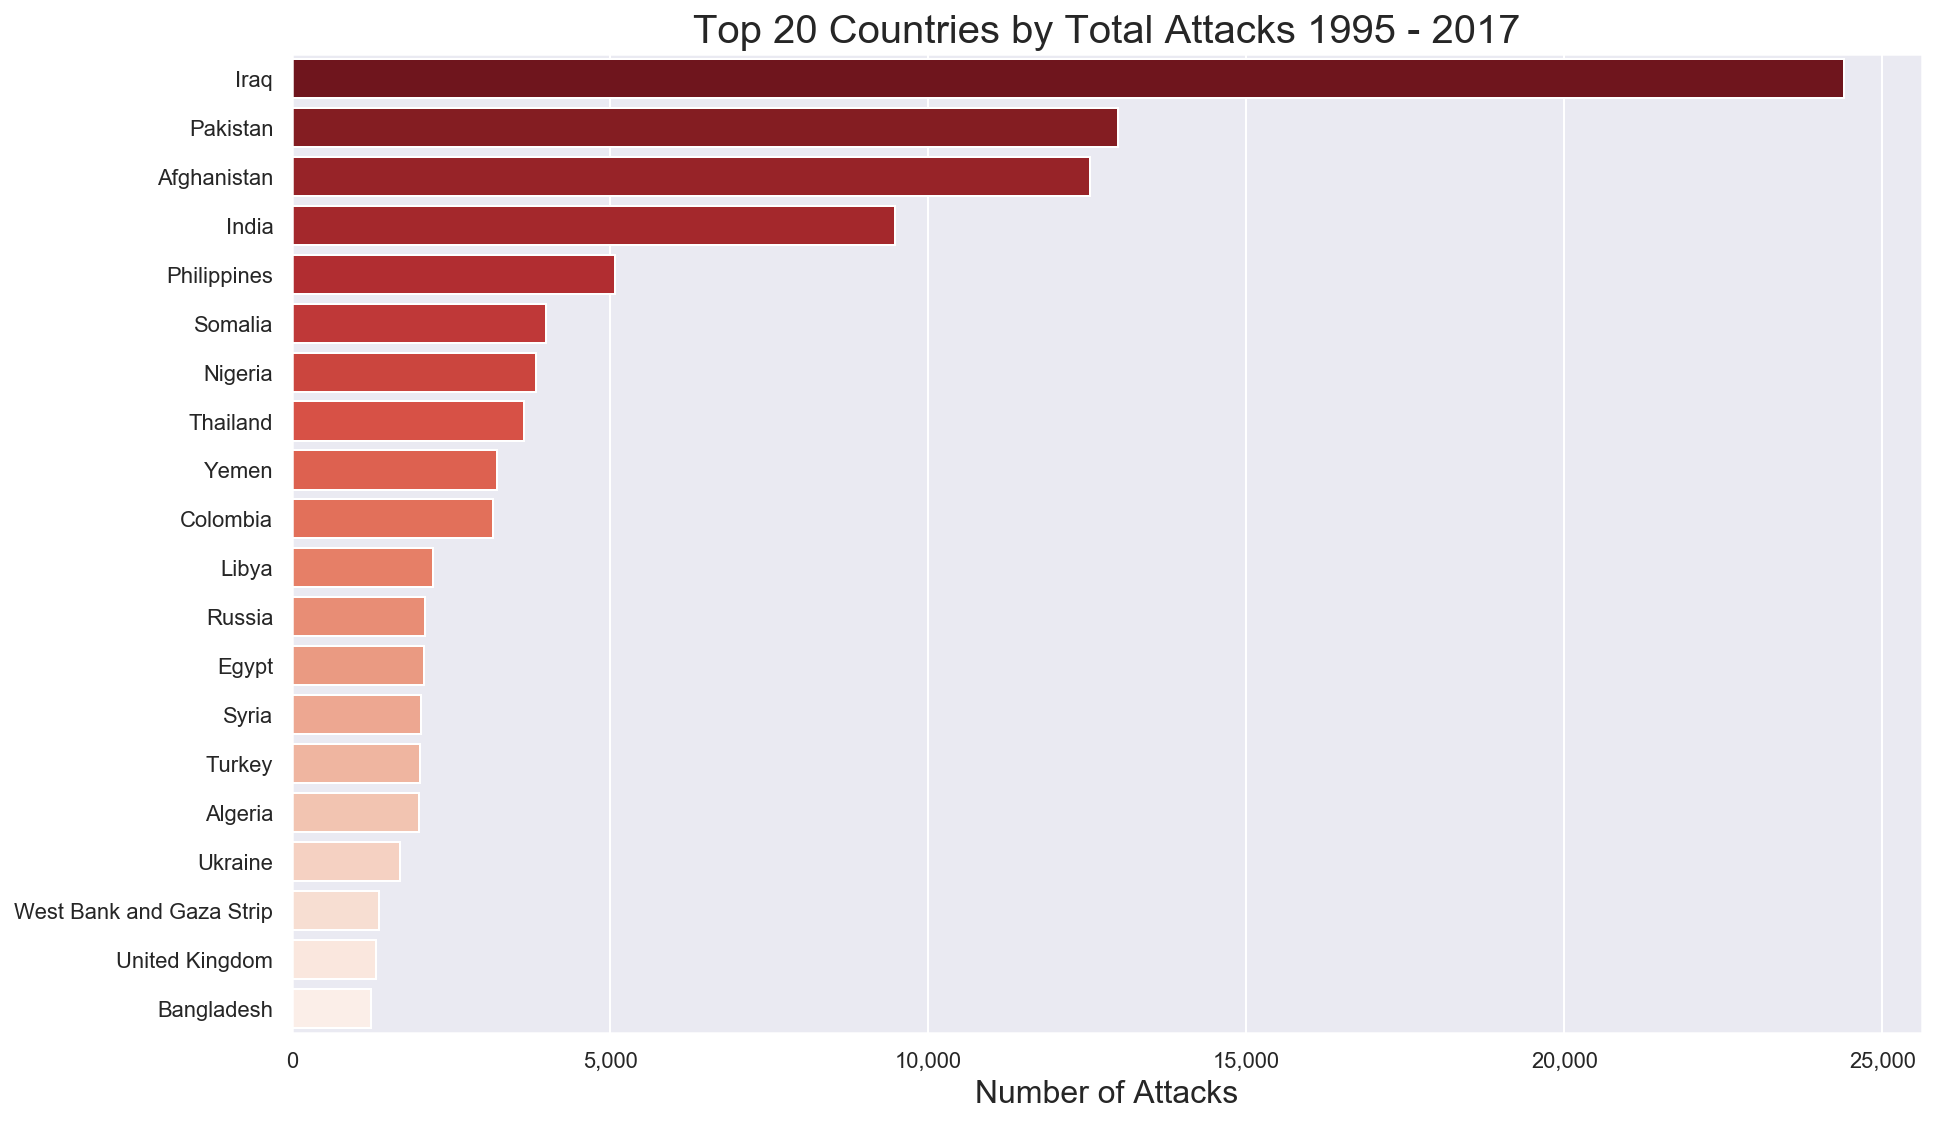

In [21]:
data = gtd_clean[['country_txt']].copy()
data['event_id'] = data.index

# Calculate the number of attacks
data = data.groupby(['country_txt']).agg(['count'])
data = data.reset_index()
data.columns = ['Country','Attacks']

# Order attacks descending
data = data.sort_values('Attacks', ascending=False)[0:20]
data = data.reset_index()

# Set the color palette in reverse
colors = sns.color_palette('Reds', len(data))
colors.reverse()
plt.figure(figsize=(14.6, 9.0))

# Plot bar chart with index as y values
ax = sns.barplot(data.Attacks, data.index, orient='h', palette=colors)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Reset the y labels
ax.set_yticklabels(data.Country)
ax.set_xlabel(xlabel='Number of Attacks', fontsize=16)
ax.set_title(label='Top 20 Countries by Total Attacks 1995 - 2017', fontsize=20)
plt.show();

### Attacks by Type
Plot depicting the total number of attacks by attack type

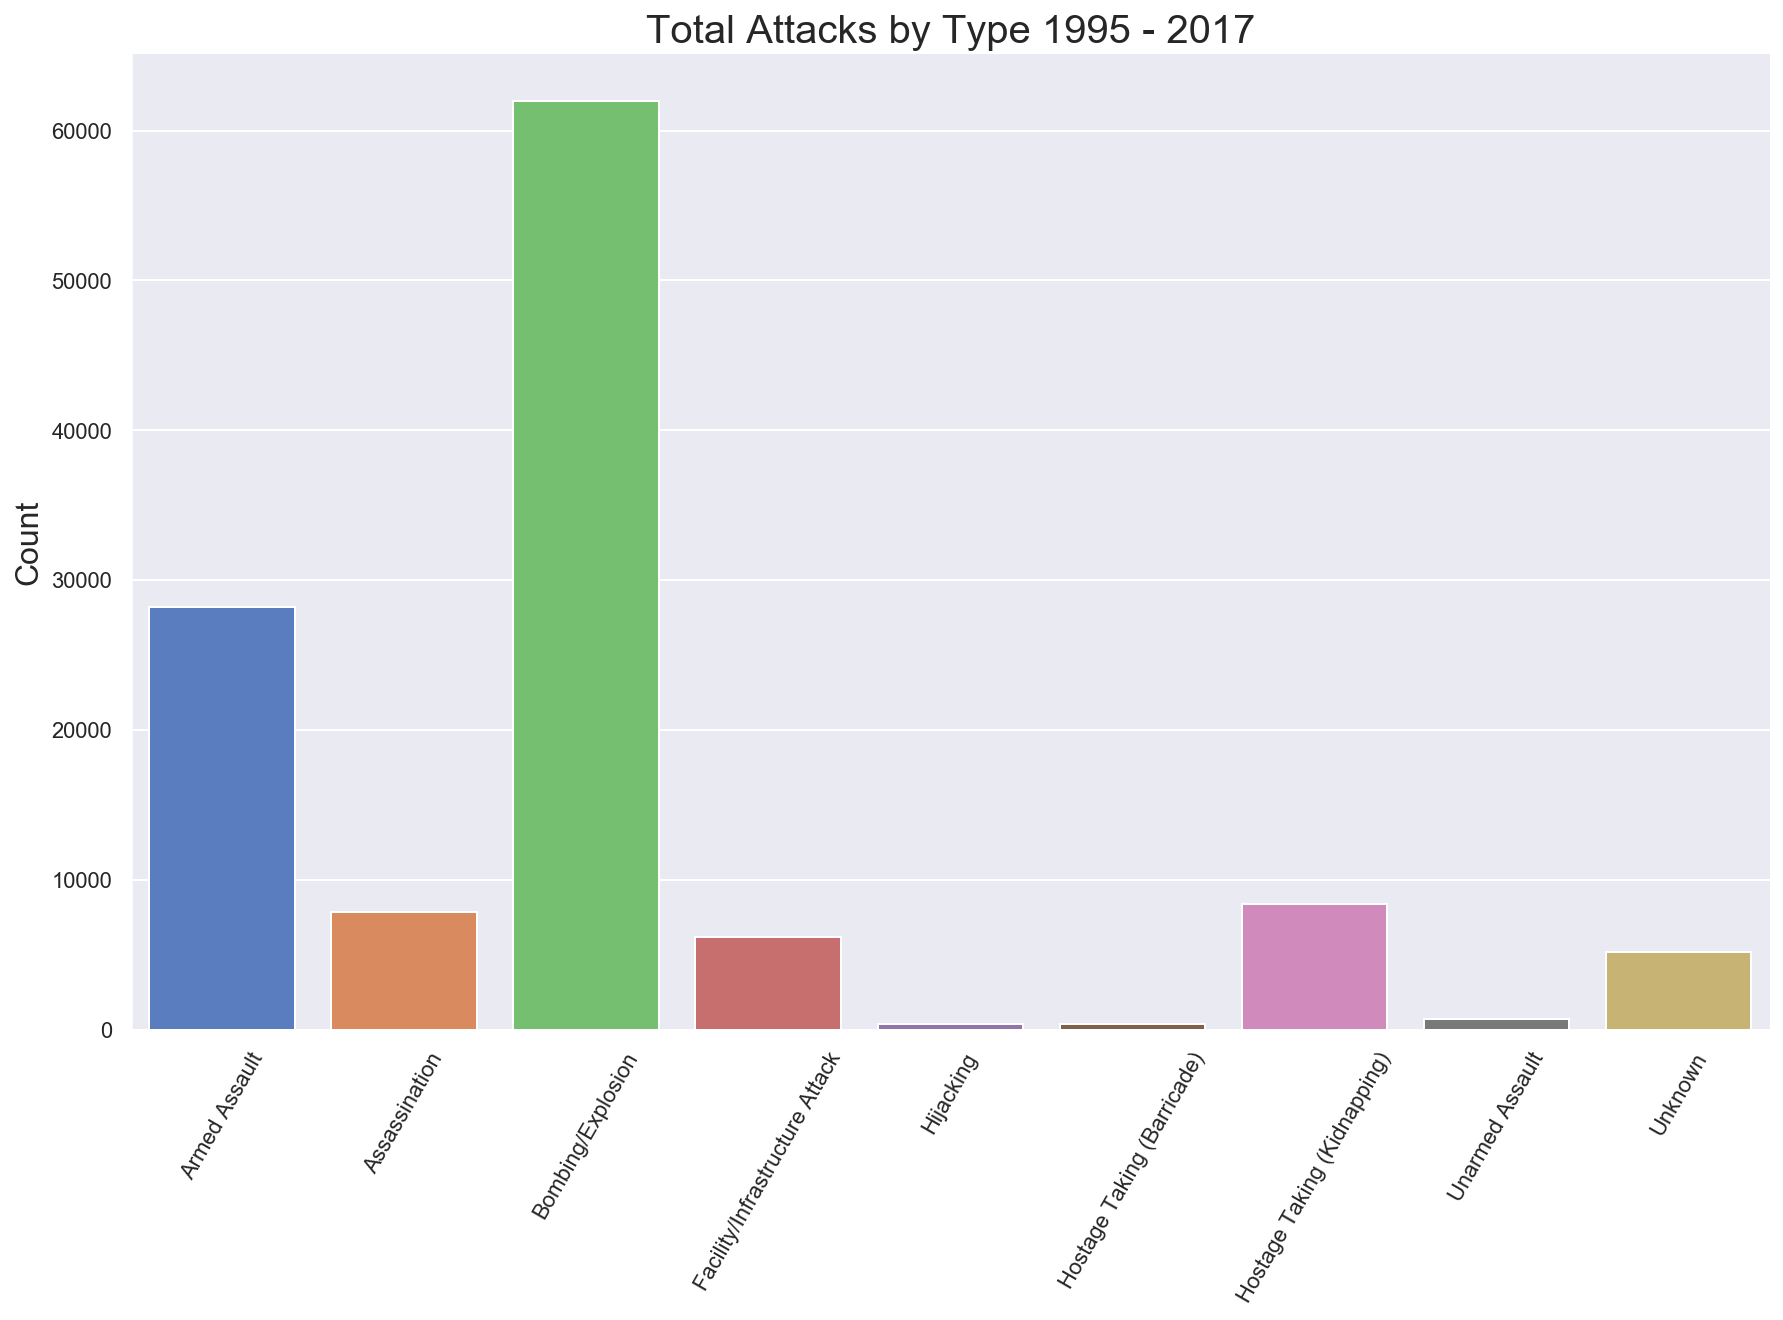

In [22]:
ax = sns.catplot('attacktype1_txt', data=gtd_clean, height=7.6, aspect=1.618, kind="count")
ax.set_xticklabels(rotation=60)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Type 1995 - 2017', fontsize=20)

plt.show();

### Attacks by Weapon Type
Plot showing the total number of attacks by weapon type

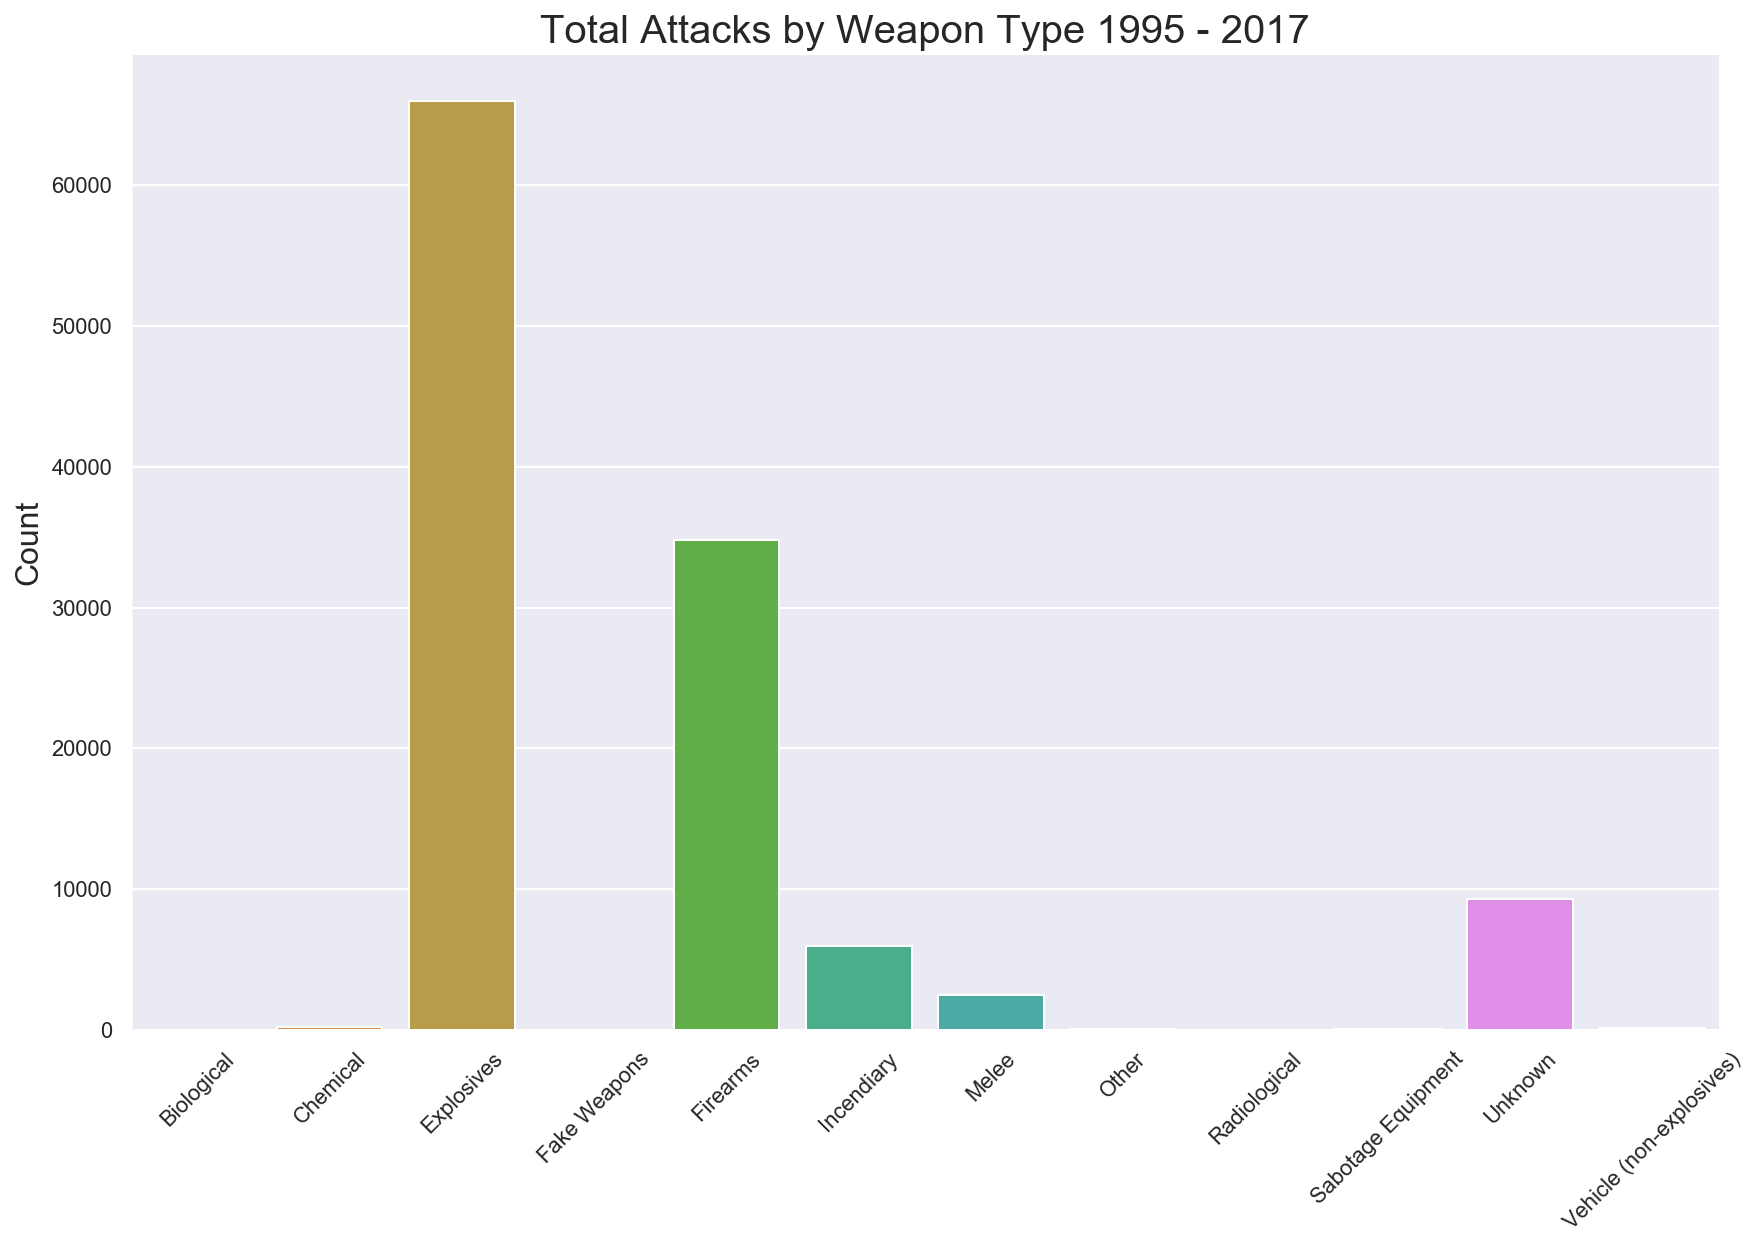

In [23]:
ax = sns.catplot('weaptype1_txt', data=gtd_clean, height=7.6, aspect=1.618, kind="count")
ax.set_xticklabels(rotation=45)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Weapon Type 1995 - 2017', fontsize=20)
plt.show();

### Fatalities Empirical Cumulative Distribution
Removing the outliers, the values greater than three standard deviations, shows that approximately 80% of attacks have less than three fatalities.

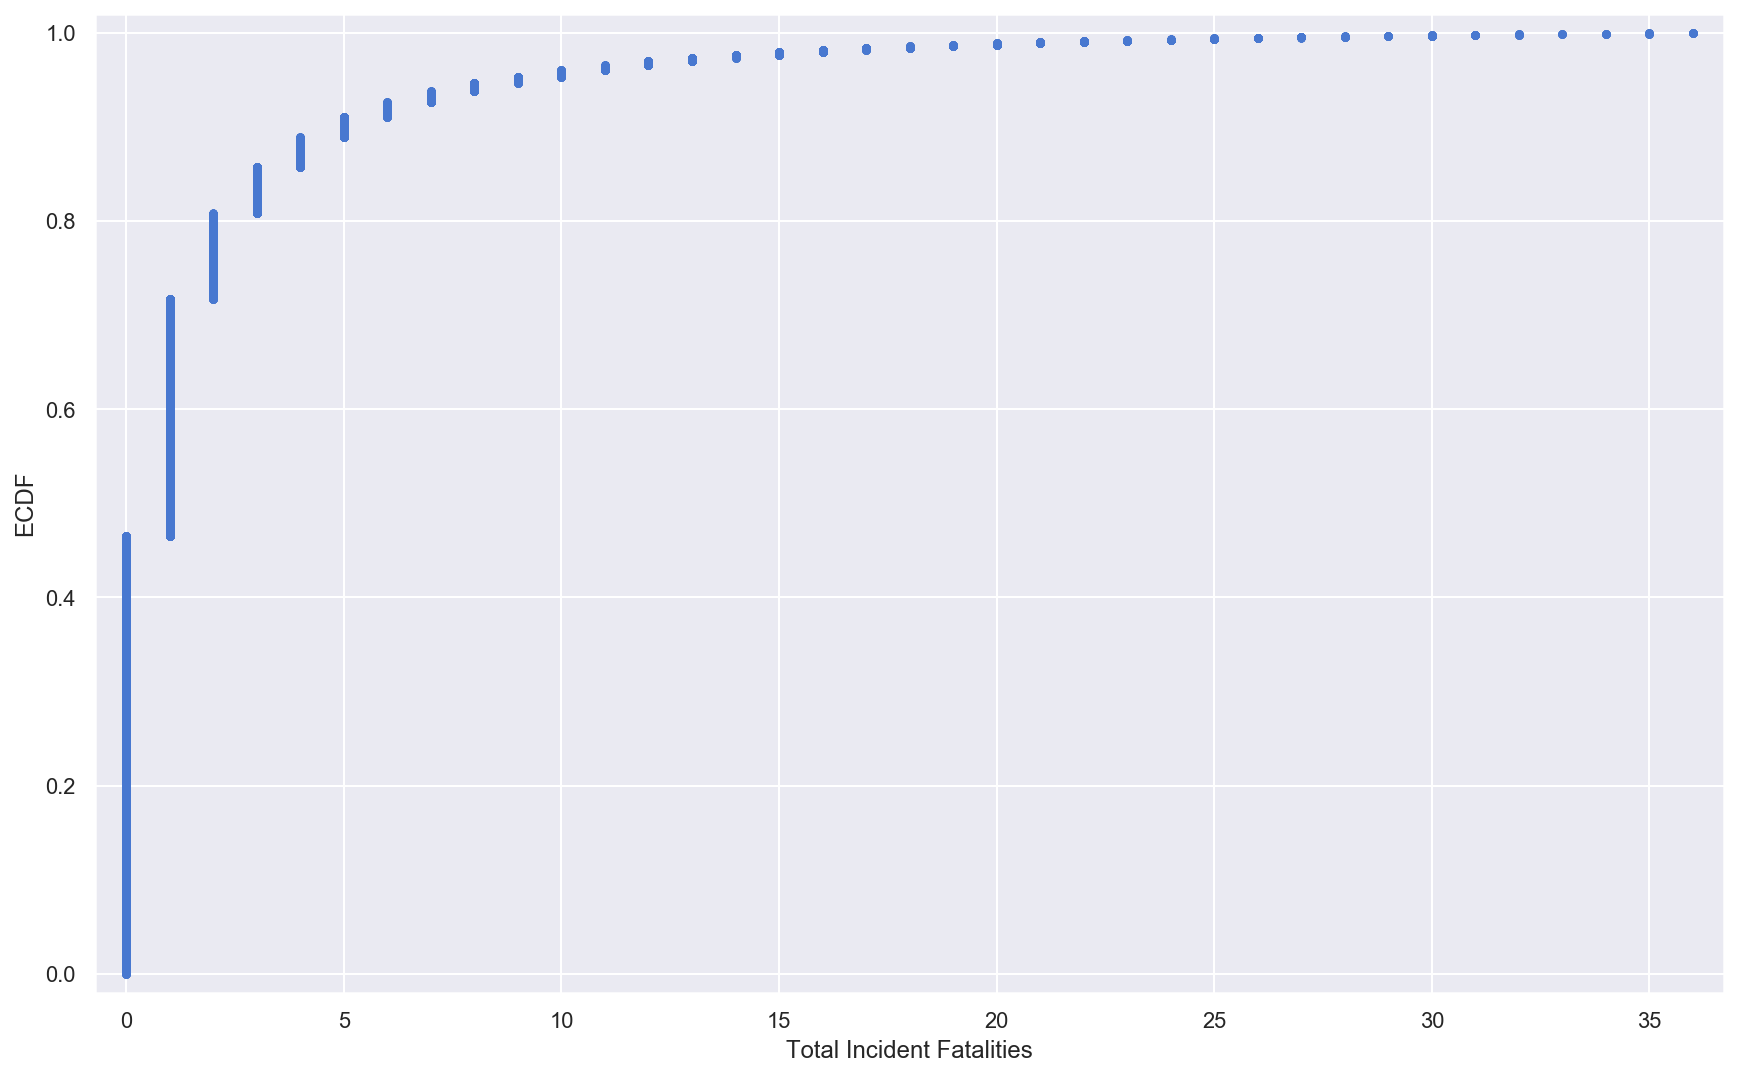

In [24]:
# Remove outliers
nkill_std = gtd_clean['nkill'].std()
nkill_no_outliers = gtd_clean[gtd_clean['nkill'] <= (3 * nkill_std)]

# x is the quantity measured
x = np.sort(nkill_no_outliers['nkill'])

# y is faction of data points that have value smaller than the corresponding x value
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Total Incident Fatalities')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

### Ideological Attacks by Region
Create a cross tabulation to analyze region and ideological attacks.

In [25]:
xtab = pd.crosstab(index = gtd_clean['region_txt'], columns = gtd_clean['INT_IDEO_txt'], margins=True)
xtab

INT_IDEO_txt,NO,UKNOWN,YES,All
region_txt,,,,
Australasia & Oceania,12,88,11,111
Central America & Caribbean,30,282,9,321
Central Asia,29,307,17,353
East Asia,101,227,11,339
Eastern Europe,515,3161,986,4662
Middle East & North Africa,7396,26878,7823,42097
North America,118,707,160,985
South America,2417,1270,159,3846
South Asia,14510,21591,2489,38590


References
Bois, J. (n.d.). Plotting all of your data: Empirical cumulative distribution functions Retrieved from https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=11